## importing library 

In [462]:
#data wrangling
from collections import Counter
import numpy as np
import pandas as pd
import missingno  
import matplotlib.pyplot as plt
import seaborn as sns
import vaex 
import matplotlib 
%matplotlib inline

#remove warnings
import warnings
warnings.filterwarnings('ignore')


# Read data


In [463]:
train = pd.read_csv('train.csv')

In [464]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [465]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [466]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [467]:
test = pd.read_csv('test.csv')

In [468]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [469]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [470]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [471]:
ss = pd.read_csv('gender_submission.csv')
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [472]:
test.shape


(418, 11)

In [473]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [474]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [475]:
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [476]:
test.columns.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [477]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [478]:
ss.shape


(418, 2)

<AxesSubplot:>

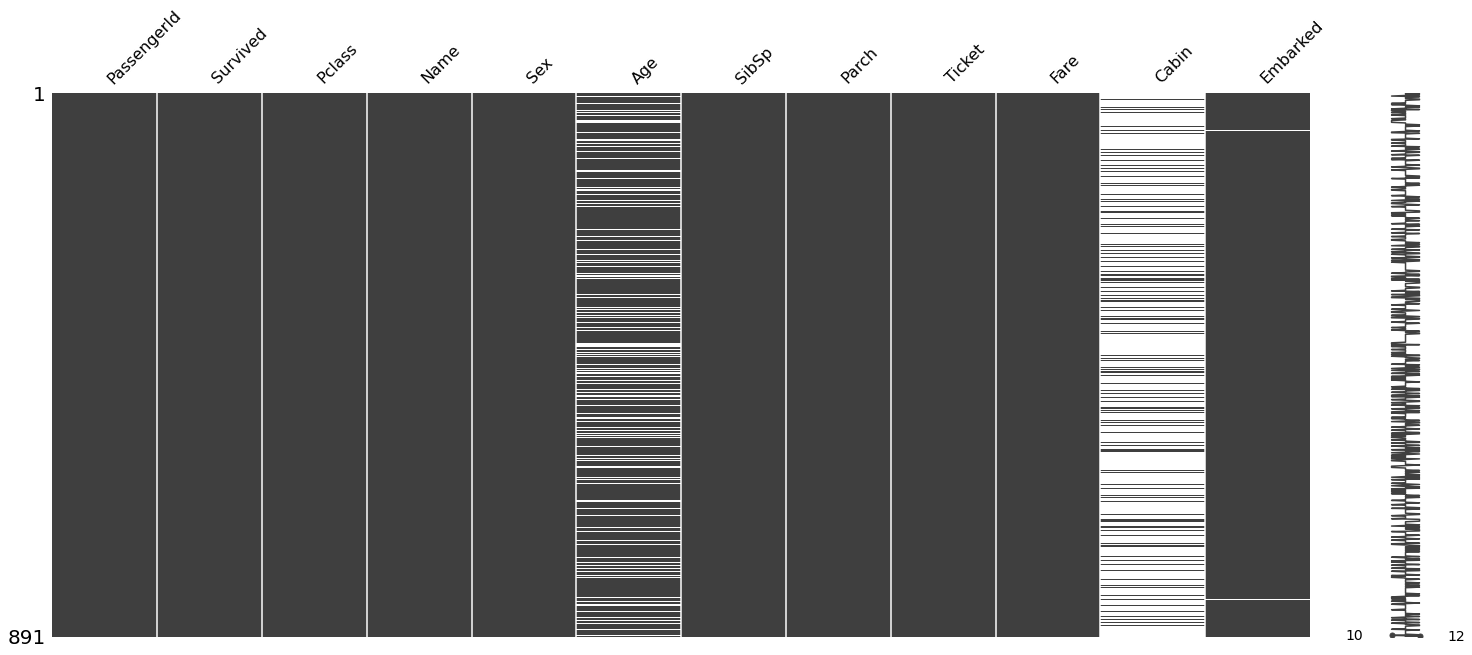

In [479]:
#missing data in in train csv 
missingno.matrix(train)

<AxesSubplot:>

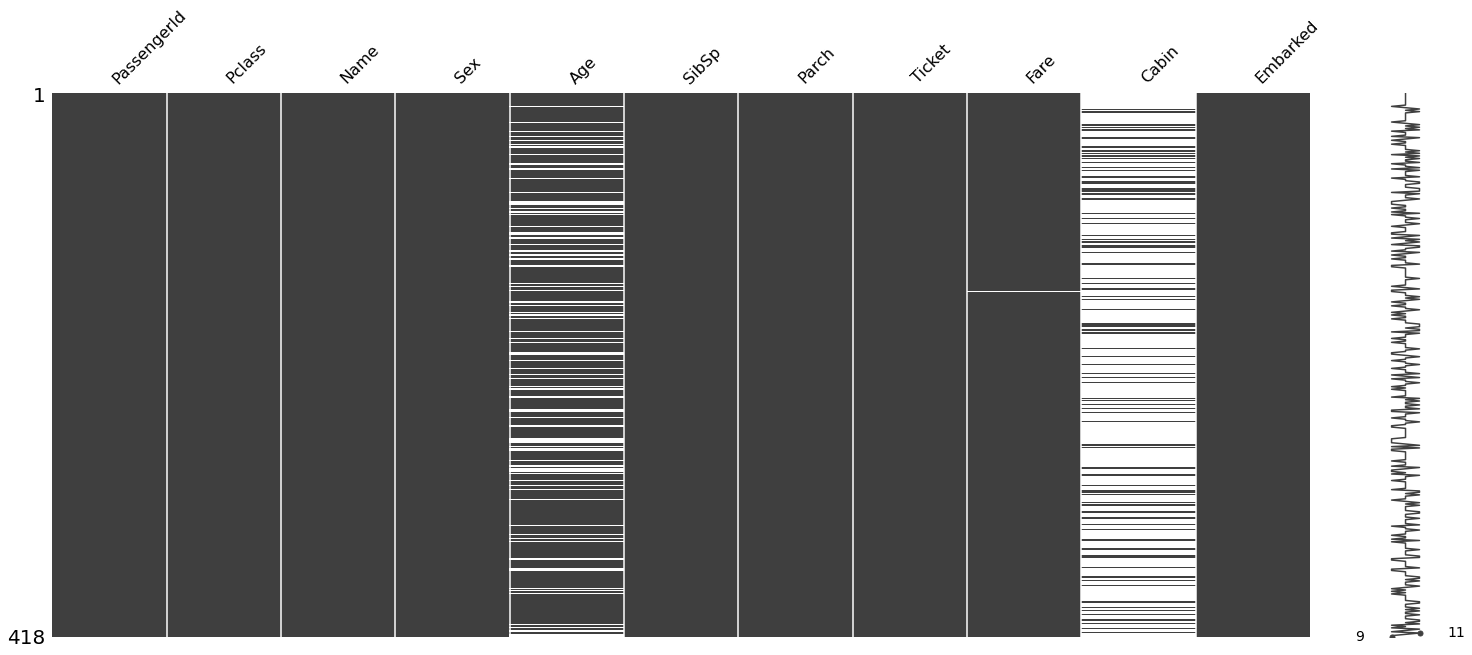

In [480]:
#missing values in test set
missingno.matrix(test)

In [481]:
#summary of statistics of training data set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [482]:
#summary of statistics of test data set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [483]:
#value counts on the sex columns for training datasets
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [484]:
#mean of survival by sex
train[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

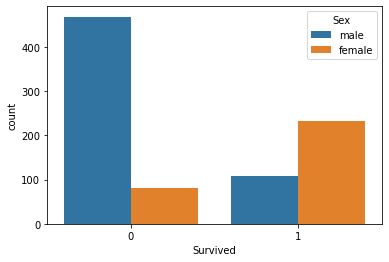

In [485]:
sns.countplot(x='Survived',hue='Sex',data=train)
# there are more than  female survived than male.

Text(0.5, 1.0, 'Survival probability by gender')

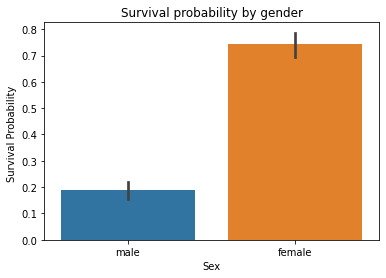

In [486]:
sns.barplot(x='Sex',y='Survived',data=train)
plt.ylabel('Survival Probability ')
plt.title('Survival probability by gender')

## Categorical  Variable : Pclass 

In [487]:
#value counts of the pclass columns
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Survival Probability in Passenger class')

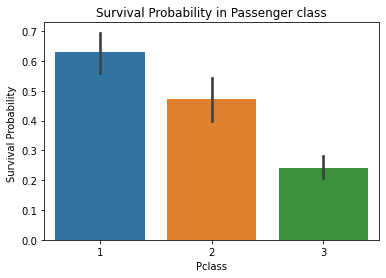

In [488]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.ylabel('Survival Probability ')
plt.title('Survival Probability in Passenger class')
#Commen: Survival probability with passenger Class and its decrease according to passenger class


<AxesSubplot:xlabel='Survived', ylabel='count'>

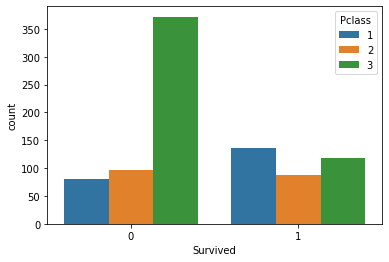

In [489]:
sns.countplot(x='Survived',hue='Pclass',data=train)
# comment according to  passenger class 1st class much more survived than 3rd class


In [490]:
#Mean of the survival for passenger class
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629108
1,2,0.472826
2,3,0.245868


Text(0.5, 1.0, 'Survival probability gender and pclass')

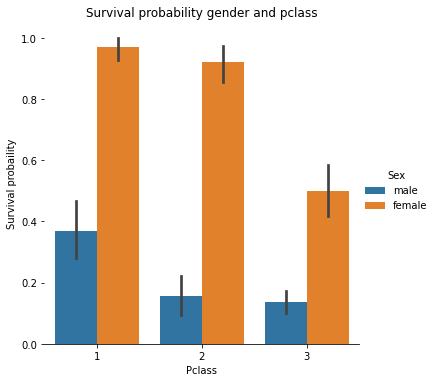

In [491]:
# Survival by gender and passenger class
g = sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train,kind='bar')
g.despine(left=True)
plt.ylabel('Survival probaility')
plt.title('Survival probability gender and pclass')

## Categorical  varaible : Embarked

In [492]:
#value counts in Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [493]:
# Survival mean in Embarked column
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival probability point of embarkation')

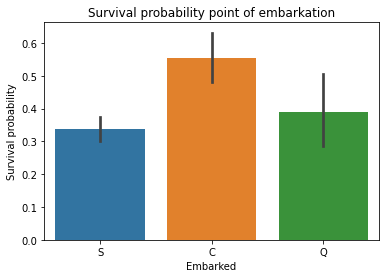

In [494]:
sns.barplot(x='Embarked',y='Survived', data=train)
plt.ylabel('Survival probability')
plt.title('Survival probability point of embarkation')
#Embarked colmn in the location of s in lower than the c location for survival probability


Text(0.5, 1.0, 'Survival count in point of embarkation')

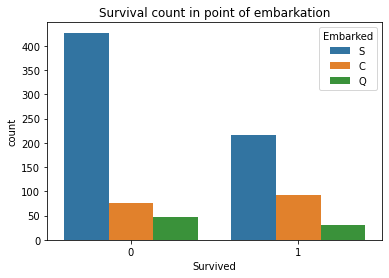

In [495]:
sns.countplot(x='Survived',hue='Embarked',data=train)
plt.title('Survival count in point of embarkation')

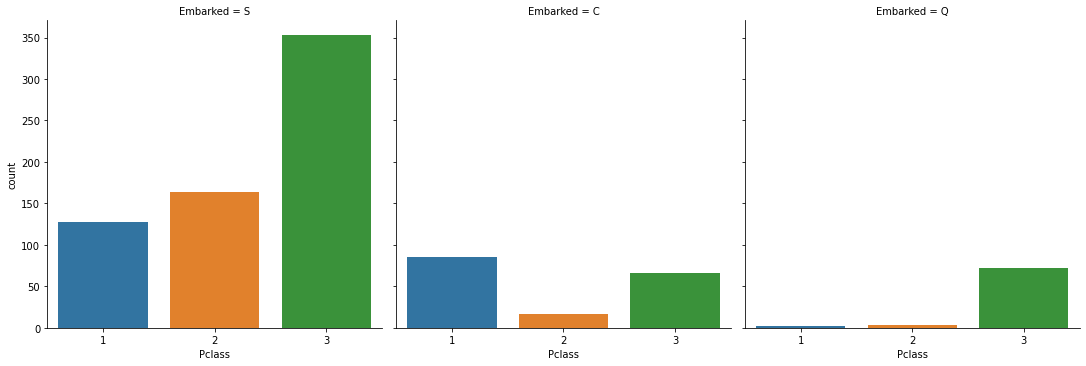

In [496]:
sns.factorplot('Pclass',col='Embarked',data=train, kind='count')


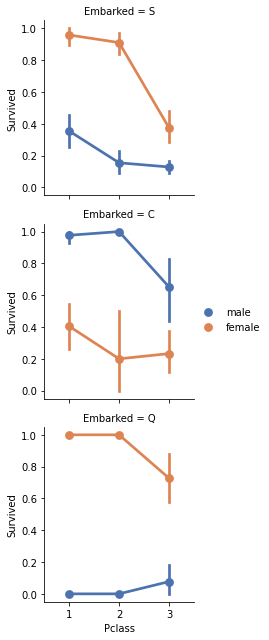

In [497]:
grid = sns.FacetGrid(train,row='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

##  numerical variables  

In [498]:
def detect_outliers(df, n, features):
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [499]:

# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [500]:

# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train_df = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 891 rows


## Numerical variables and correlation with  survival

<AxesSubplot:>

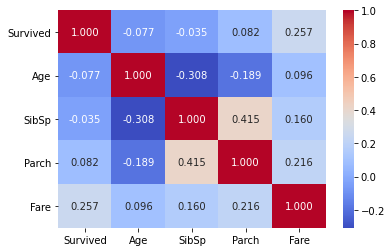

In [501]:
sns.heatmap(train[['Survived','Age','SibSp','Parch','Fare']].corr(),annot = True, fmt = '.3f', cmap = 'coolwarm')
#coreealation with numerical values

##  Numerical variables:SibSp

In [502]:
train['SibSp'].value_counts()
#value counts in siblings of survival passenger

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [503]:
#Mean value survived with relation with siblings
train[['Survived','SibSp']].groupby('SibSp',as_index=False,).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

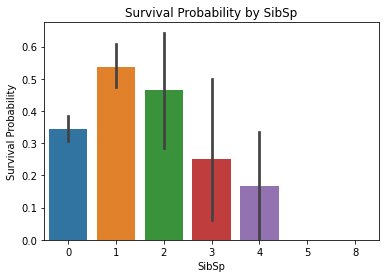

In [504]:
#barplot survival siblings
sns.barplot(x='SibSp',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

## Numerical Variable: Parch

In [505]:
#value counts in parch
train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [506]:
#mean vlaue Survival parch
train[['Survived','Parch']].groupby('Parch',as_index = False).mean().sort_values('Survived',ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

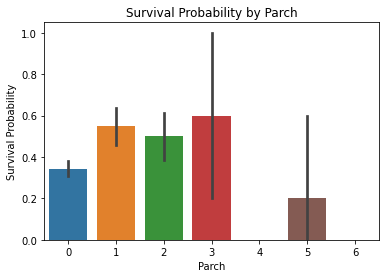

In [507]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

## Numerical Variable Age

In [508]:
#null Value  in age columns
train['Age'].isnull().sum()

177

Text(0.5, 1.0, 'Passenger Age Distribution')

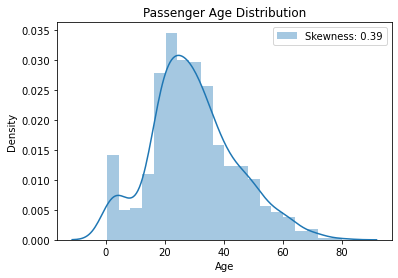

In [509]:
# Passenger age distribution
sns.distplot(train['Age'],label ='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

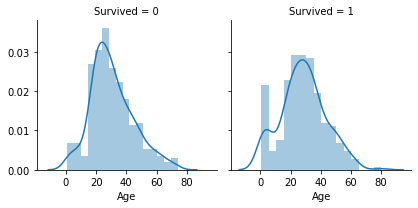

In [510]:
#Age distribution of survival
grid = sns.FacetGrid(train,col = 'Survived')
grid.map(sns.distplot,'Age')

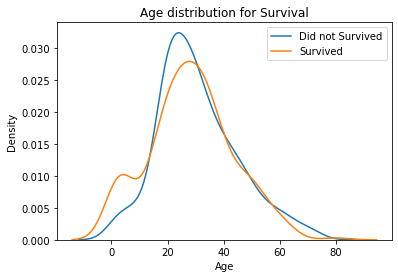

In [511]:
sns.kdeplot(train['Age'][train['Survived'] ==0 ],label ='Did not Survived')
sns.kdeplot(train['Age'][train['Survived'] ==1 ],label ='Survived')
plt.xlabel('Age')
plt.title('Age distribution for Survival')
plt.legend(loc='best')

## Numerical variable: Fare

In [512]:
# null value in fare
train['Fare'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger fare distribution')

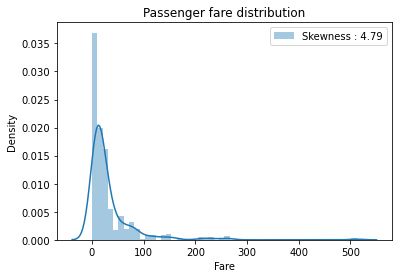

In [513]:
# passenger fare distribution
sns.distplot(train['Fare'], label = 'Skewness : %.2f'%train['Fare'].skew())
plt.legend(loc='best')
plt.title('Passenger fare distribution')
#fare have seems to high skewness

##  Data preprocessing : Data wrangling and cleaning

In [514]:
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [515]:
train = train.drop(['Ticket','Cabin'],axis = 1)

In [516]:
test = test.drop(['Ticket','Cabin'],axis = 1)

In [517]:
#missing values in training set
train.isnull().sum().sort_values(ascending = False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [518]:
#compute the most frequent value embarked the trainiing set
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [519]:
# fill missing value embarked
train['Embarked'].fillna(mode,inplace=True)

In [520]:
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [521]:
# compute most frequent value fare in the training set
mean = test['Fare'].mean()
mean

35.6271884892086

In [522]:
test['Fare'].fillna(mean,inplace = True)

In [523]:
# combinig test set and training set
combine = pd.concat([train,test] ,axis = 0)
combine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [524]:
combine.shape

(1309, 10)

In [525]:
combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [526]:
#convert sex into numerical values where male = 0 and  female  = 1
combine['Sex'] = combine['Sex'].map({'male':0, 'female':1})

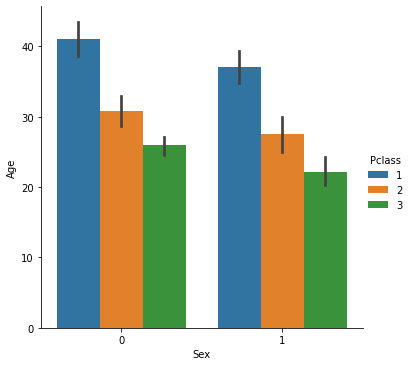

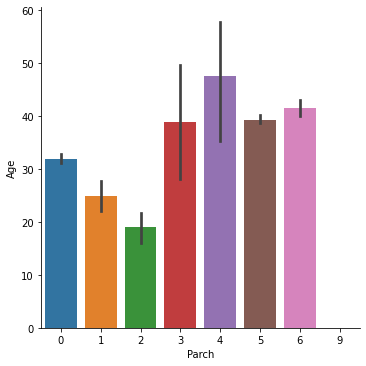

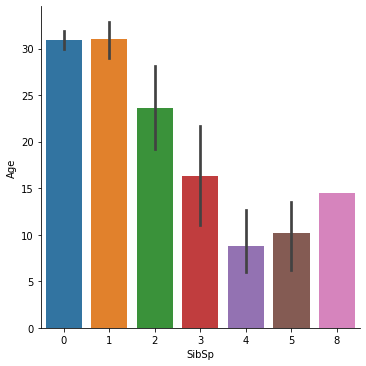

In [527]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'bar', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'bar', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'bar', data = combine)

<AxesSubplot:>

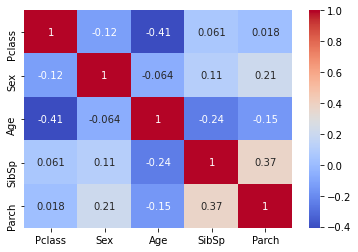

In [528]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'],axis=1).corr(), annot = True, cmap = 'coolwarm')

In [529]:
#check of missing ages
age_nan = list(combine[combine['Age'].isnull()].index)
len(age_nan)

263

In [530]:
# taking care in missing data
from sklearn.impute import SimpleImputer

def clean_missing_data(df):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    df['Age'] = imputer.fit_transform(df[['Age']])

   
    return df

combine = clean_missing_data(combine)


In [531]:
combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

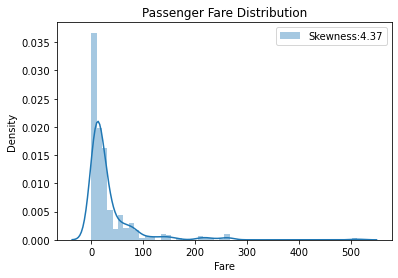

In [532]:
# fare skewness
sns.distplot(combine['Fare'], label='Skewness:%.2f'%(combine['Fare'].skew()))
#sns.distplot(combine['Fare'], label='Kurtusis:%.2f'%(combine['Fare'].kurt()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [533]:
# apply log transformation  to reduce skewness
combine['Fare'] = combine['Fare'].map(lambda x : np.log(x) if x>0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

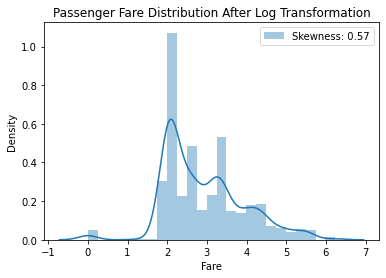

In [534]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## Feature engineering

In [535]:
combine.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",0,28.0,0,0,2.085672,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,4.690430,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,1.981001,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,28.0,0,0,2.085672,S
417,1309,NaN,3,"Peter, Master. Michael J",0,28.0,1,1,3.107198,C


In [536]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [537]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
Jonkheer          1
Sir               1
Mme               1
the Countess      1
Don               1
Dona              1
Capt              1
Name: Title, dtype: int64

In [538]:
#number unique title
combine['Title'].nunique()

18

In [539]:
#Simplify title
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

Text(0.5, 1.0, ' count in title ')

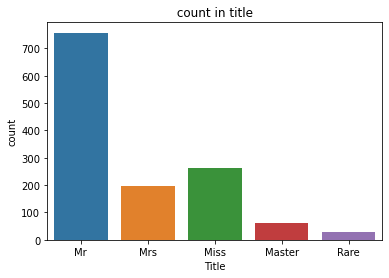

In [540]:
sns.countplot(x='Title',data = combine)
plt.title(' count in title ')

In [541]:
# mean of survival probability of title
combine[['Title','Survived']].groupby(['Title'],as_index = False).mean().sort_values('Survived',ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


Text(0.5, 6.79999999999999, 'Probability of survived')

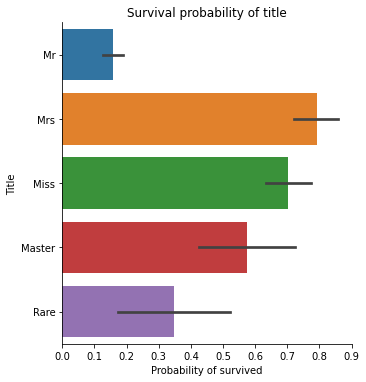

In [542]:
sns.factorplot(x='Survived',y = 'Title',data=combine,kind='bar')
plt.title('Survival probability of title')
plt.xlabel('Probability of survived')

In [543]:
#Calculate Family size of Sibsp and parch
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] +1
combine[['SibSp','Parch','FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [544]:
# Mean of survival by family size
combine[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [545]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [546]:
combine[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean().sort_values('Survived',ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [547]:

# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1.981001,S,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,2.070022,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,2.085672,S,Mr,1


In [548]:

# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [549]:

# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [550]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [551]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [552]:

# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int64')
combine['Age'].dtype

dtype('int64')

In [553]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## Feature Encoding


In [554]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1.981001,S,Mr,0,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,2.070022,S,Miss,1,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,2.085672,S,Mr,1,6


In [555]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [556]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [557]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.504983
3,"(4.679, 6.239]",0.745098


In [558]:
combine.loc[combine['Fare']>=1.56,'Fare']=0
combine.loc[(combine['Fare']<1.56) & (combine['Fare']>=3.119),'Fare']=1
combine.loc[(combine['Fare']<3.119) & (combine['Fare']>=4.679),'Fare']=2
combine.loc[(combine['Fare']<4.679) & (combine['Fare']>=6.239),'Fare']=3

In [559]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [560]:

# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [561]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [562]:
#Separate train and test 
train = combine[:len(train)]
test = combine[len(train):]

In [563]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [564]:
train.shape

(891, 16)

In [565]:
train_df.shape

(881, 12)

In [566]:

# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [567]:
#Converting Survived columns into integer
train['Survived']=train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [568]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,892,NaN,3,0,2,0,1,6,0,0,1,0,0,0,1,0
1,893,NaN,3,1,2,0,0,6,0,0,0,1,0,0,0,1
2,894,NaN,2,0,3,0,1,6,0,0,1,0,0,0,1,0
3,895,NaN,3,0,1,0,1,3,0,0,1,0,0,0,0,1
4,896,NaN,3,1,1,0,0,3,0,0,0,1,0,0,0,1


In [569]:
test = test.drop('Survived',axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,892,3,0,2,0,1,6,0,0,1,0,0,0,1,0
1,893,3,1,2,0,0,6,0,0,0,1,0,0,0,1
2,894,2,0,3,0,1,6,0,0,1,0,0,0,1,0
3,895,3,0,1,0,1,3,0,0,1,0,0,0,0,1
4,896,3,1,1,0,0,3,0,0,0,1,0,0,0,1


In [570]:
test.shape

(418, 15)

## Modeling

In [571]:
from sklearn.model_selection import train_test_split


X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)


X_train shape:  (891, 14)
Y_train shape:  (891,)
X_test shape:  (418, 14)


## Fit mode the data and prdiction 
 There are three require steps : 1st Creating regression obj then fit the train obj finally predict test obj  

## Logistics regression

In [572]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acclog = round(logreg.score(X_train,Y_train)*100,2)
acclog



81.26

## Support Vector machine


In [573]:
from sklearn.svm import SVC
svcreg = SVC()
svcreg.fit(X_train, Y_train)
Y_pred = svcreg.predict(X_test)
acc_svc = round(svcreg.score(X_train, Y_train) * 100, 2)
acc_svc

80.13

## K-nearest neighbours(KNN)

In [574]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn =round(knn.score(X_train,Y_train)*100,2)
acc_knn

83.73

## Guissian Naive Bayes

In [575]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
Y_pred= gnb.predict(X_test)
acc_gnb = round(gnb.score(X_train,Y_train)*100,2)
acc_gnb

59.37

## Perceptron

In [576]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.65

## Linear SVC

In [577]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.7

## Stochastic gradient descent

In [578]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.09

##  Decision tree

In [579]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.18

## Random Forest 

In [580]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.18

## Catboost Classifier


In [581]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.009807
0:	learn: 0.6863546	total: 1.99ms	remaining: 1.99s
1:	learn: 0.6796162	total: 3.99ms	remaining: 1.99s
2:	learn: 0.6739321	total: 5.86ms	remaining: 1.95s
3:	learn: 0.6678272	total: 7.82ms	remaining: 1.95s
4:	learn: 0.6617649	total: 9.53ms	remaining: 1.9s
5:	learn: 0.6562471	total: 11.5ms	remaining: 1.91s
6:	learn: 0.6518367	total: 12.8ms	remaining: 1.82s
7:	learn: 0.6461601	total: 14.6ms	remaining: 1.81s
8:	learn: 0.6406419	total: 16.4ms	remaining: 1.8s
9:	learn: 0.6351079	total: 18.2ms	remaining: 1.8s
10:	learn: 0.6321141	total: 19.7ms	remaining: 1.77s
11:	learn: 0.6267728	total: 21.4ms	remaining: 1.76s
12:	learn: 0.6221091	total: 23.3ms	remaining: 1.77s
13:	learn: 0.6179384	total: 25.2ms	remaining: 1.77s
14:	learn: 0.6138440	total: 27ms	remaining: 1.77s
15:	learn: 0.6095120	total: 28.8ms	remaining: 1.77s
16:	learn: 0.6047662	total: 30.7ms	remaining: 1.78s
17:	learn: 0.6017384	total: 32.2ms	remaining: 1.76s
18:	learn: 0.5977931	total: 33.7ms	remaining: 1.7

166:	learn: 0.4099487	total: 333ms	remaining: 1.66s
167:	learn: 0.4098494	total: 335ms	remaining: 1.66s
168:	learn: 0.4095278	total: 338ms	remaining: 1.66s
169:	learn: 0.4091487	total: 341ms	remaining: 1.67s
170:	learn: 0.4089185	total: 343ms	remaining: 1.67s
171:	learn: 0.4085720	total: 346ms	remaining: 1.66s
172:	learn: 0.4081532	total: 348ms	remaining: 1.66s
173:	learn: 0.4079261	total: 350ms	remaining: 1.66s
174:	learn: 0.4076652	total: 352ms	remaining: 1.66s
175:	learn: 0.4074102	total: 354ms	remaining: 1.66s
176:	learn: 0.4071754	total: 356ms	remaining: 1.66s
177:	learn: 0.4069890	total: 359ms	remaining: 1.66s
178:	learn: 0.4067594	total: 361ms	remaining: 1.65s
179:	learn: 0.4065225	total: 363ms	remaining: 1.65s
180:	learn: 0.4064221	total: 365ms	remaining: 1.65s
181:	learn: 0.4061915	total: 368ms	remaining: 1.65s
182:	learn: 0.4058156	total: 370ms	remaining: 1.65s
183:	learn: 0.4054737	total: 373ms	remaining: 1.65s
184:	learn: 0.4054345	total: 374ms	remaining: 1.65s
185:	learn: 

330:	learn: 0.3855382	total: 674ms	remaining: 1.36s
331:	learn: 0.3855059	total: 677ms	remaining: 1.36s
332:	learn: 0.3854305	total: 681ms	remaining: 1.36s
333:	learn: 0.3852953	total: 683ms	remaining: 1.36s
334:	learn: 0.3851957	total: 685ms	remaining: 1.36s
335:	learn: 0.3851058	total: 687ms	remaining: 1.36s
336:	learn: 0.3850914	total: 689ms	remaining: 1.35s
337:	learn: 0.3849420	total: 691ms	remaining: 1.35s
338:	learn: 0.3848655	total: 693ms	remaining: 1.35s
339:	learn: 0.3847614	total: 695ms	remaining: 1.35s
340:	learn: 0.3846233	total: 697ms	remaining: 1.35s
341:	learn: 0.3845431	total: 700ms	remaining: 1.35s
342:	learn: 0.3845374	total: 702ms	remaining: 1.34s
343:	learn: 0.3844452	total: 704ms	remaining: 1.34s
344:	learn: 0.3843622	total: 705ms	remaining: 1.34s
345:	learn: 0.3842552	total: 707ms	remaining: 1.34s
346:	learn: 0.3842099	total: 709ms	remaining: 1.33s
347:	learn: 0.3841533	total: 711ms	remaining: 1.33s
348:	learn: 0.3841006	total: 713ms	remaining: 1.33s
349:	learn: 

506:	learn: 0.3757515	total: 1.01s	remaining: 988ms
507:	learn: 0.3757301	total: 1.02s	remaining: 987ms
508:	learn: 0.3757236	total: 1.02s	remaining: 986ms
509:	learn: 0.3756632	total: 1.02s	remaining: 984ms
510:	learn: 0.3756143	total: 1.03s	remaining: 982ms
511:	learn: 0.3755616	total: 1.03s	remaining: 980ms
512:	learn: 0.3755250	total: 1.03s	remaining: 978ms
513:	learn: 0.3754530	total: 1.03s	remaining: 976ms
514:	learn: 0.3754259	total: 1.03s	remaining: 974ms
515:	learn: 0.3753945	total: 1.04s	remaining: 972ms
516:	learn: 0.3753195	total: 1.04s	remaining: 970ms
517:	learn: 0.3753093	total: 1.04s	remaining: 967ms
518:	learn: 0.3752555	total: 1.04s	remaining: 965ms
519:	learn: 0.3752461	total: 1.04s	remaining: 963ms
520:	learn: 0.3752454	total: 1.04s	remaining: 960ms
521:	learn: 0.3752448	total: 1.04s	remaining: 958ms
522:	learn: 0.3752255	total: 1.05s	remaining: 955ms
523:	learn: 0.3751668	total: 1.05s	remaining: 953ms
524:	learn: 0.3751053	total: 1.05s	remaining: 951ms
525:	learn: 

754:	learn: 0.3680871	total: 1.47s	remaining: 478ms
755:	learn: 0.3680623	total: 1.48s	remaining: 477ms
756:	learn: 0.3680078	total: 1.48s	remaining: 475ms
757:	learn: 0.3679642	total: 1.48s	remaining: 473ms
758:	learn: 0.3679411	total: 1.48s	remaining: 471ms
759:	learn: 0.3679201	total: 1.49s	remaining: 470ms
760:	learn: 0.3679117	total: 1.49s	remaining: 468ms
761:	learn: 0.3678969	total: 1.49s	remaining: 466ms
762:	learn: 0.3678507	total: 1.49s	remaining: 464ms
763:	learn: 0.3678266	total: 1.49s	remaining: 462ms
764:	learn: 0.3678257	total: 1.5s	remaining: 460ms
765:	learn: 0.3678255	total: 1.5s	remaining: 458ms
766:	learn: 0.3677768	total: 1.5s	remaining: 456ms
767:	learn: 0.3677457	total: 1.5s	remaining: 454ms
768:	learn: 0.3677352	total: 1.5s	remaining: 452ms
769:	learn: 0.3677175	total: 1.51s	remaining: 450ms
770:	learn: 0.3676618	total: 1.51s	remaining: 449ms
771:	learn: 0.3676523	total: 1.51s	remaining: 447ms
772:	learn: 0.3676462	total: 1.51s	remaining: 445ms
773:	learn: 0.367

934:	learn: 0.3632354	total: 1.82s	remaining: 127ms
935:	learn: 0.3632072	total: 1.82s	remaining: 125ms
936:	learn: 0.3631908	total: 1.82s	remaining: 123ms
937:	learn: 0.3631440	total: 1.83s	remaining: 121ms
938:	learn: 0.3630926	total: 1.83s	remaining: 119ms
939:	learn: 0.3630615	total: 1.83s	remaining: 117ms
940:	learn: 0.3630132	total: 1.83s	remaining: 115ms
941:	learn: 0.3630054	total: 1.84s	remaining: 113ms
942:	learn: 0.3629878	total: 1.84s	remaining: 111ms
943:	learn: 0.3629644	total: 1.84s	remaining: 109ms
944:	learn: 0.3629454	total: 1.84s	remaining: 107ms
945:	learn: 0.3629278	total: 1.85s	remaining: 105ms
946:	learn: 0.3628820	total: 1.85s	remaining: 103ms
947:	learn: 0.3628391	total: 1.85s	remaining: 102ms
948:	learn: 0.3628184	total: 1.85s	remaining: 99.6ms
949:	learn: 0.3628023	total: 1.85s	remaining: 97.6ms
950:	learn: 0.3627811	total: 1.86s	remaining: 95.7ms
951:	learn: 0.3627530	total: 1.86s	remaining: 93.7ms
952:	learn: 0.3627322	total: 1.86s	remaining: 91.8ms
953:	le

In [582]:
acc_catboost 

84.06

## Light gbm 

In [583]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, Y_train)
Y_pred = lgb.predict(X_test)
acc_lgb = round(lgb.score(X_train, Y_train) * 100, 2)
acc_lgb

84.18

## XG Boost

In [584]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train,Y_train)*100,2)
acc_xgb

83.61

## Model Evaluation and Hyperparameter tuning
Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy.

## Training accuracy


In [585]:

models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost','Light GBM','XGB Boost'],
                       'Score': [acc_svc, acc_knn, acclog, acc_random_forest, acc_gnb, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost,acc_lgb,acc_xgb]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,84.18
1,Decision Tree,84.18
2,Light GBM,84.18
3,CatBoost,84.06
4,KNN,83.73
5,XGB Boost,83.61
6,Logistic Regression,81.26
7,Linear SVC,80.70
8,Support Vector Machines,80.13
9,Stochastic Gradient Decent,76.09


## K-Fold Cross Validation

In [586]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(LGBMClassifier())
classifiers.append(XGBClassifier())

len(classifiers)

12

In [587]:
# Create a list which contains cross validation results for each classifier
from sklearn.model_selection import cross_val_score
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009371
0:	learn: 0.6864868	total: 1.87ms	remaining: 1.87s
1:	learn: 0.6798137	total: 3.68ms	remaining: 1.83s
2:	learn: 0.6743096	total: 5.6ms	remaining: 1.86s
3:	learn: 0.6696213	total: 6.96ms	remaining: 1.73s
4:	learn: 0.6643284	total: 8.62ms	remaining: 1.71s
5:	learn: 0.6593745	total: 10.5ms	remaining: 1.73s
6:	learn: 0.6547026	total: 12.1ms	remaining: 1.71s
7:	learn: 0.6496225	total: 13.9ms	remaining: 1.73s
8:	learn: 0.6448247	total: 15.6ms	remaining: 1.72s
9:	learn: 0.6396241	total: 17.5ms	remaining: 1.73s
10:	learn: 0.6348419	total: 19.2ms	remaining: 1.73s
11:	learn: 0.6302277	total: 21ms	remaining: 1.73s
12:	learn: 0.6250259	total: 22.8ms	remaining: 1.73s
13:	learn: 0.6203099	total: 24.6ms	remaining: 1.73s
14:	learn: 0.6153276	total: 26.4ms	remaining: 1.73s
15:	learn: 0.6116117	total: 28.2ms	remaining: 1.73s
16:	learn: 0.6074646	total: 30ms	remaining: 1.73s
17:	learn: 0.6035465	total: 31.4ms	remaining: 1.71s
18:	learn: 0.5995572	total: 33.1ms	remaining: 1.7

174:	learn: 0.4031881	total: 332ms	remaining: 1.56s
175:	learn: 0.4029444	total: 335ms	remaining: 1.57s
176:	learn: 0.4027550	total: 337ms	remaining: 1.57s
177:	learn: 0.4024901	total: 340ms	remaining: 1.57s
178:	learn: 0.4022406	total: 342ms	remaining: 1.57s
179:	learn: 0.4019310	total: 344ms	remaining: 1.57s
180:	learn: 0.4017384	total: 347ms	remaining: 1.57s
181:	learn: 0.4014903	total: 348ms	remaining: 1.56s
182:	learn: 0.4013691	total: 350ms	remaining: 1.56s
183:	learn: 0.4011746	total: 352ms	remaining: 1.56s
184:	learn: 0.4007841	total: 354ms	remaining: 1.56s
185:	learn: 0.4006145	total: 356ms	remaining: 1.56s
186:	learn: 0.4002891	total: 358ms	remaining: 1.55s
187:	learn: 0.3999646	total: 360ms	remaining: 1.55s
188:	learn: 0.3998909	total: 361ms	remaining: 1.55s
189:	learn: 0.3995729	total: 363ms	remaining: 1.55s
190:	learn: 0.3993203	total: 365ms	remaining: 1.54s
191:	learn: 0.3991476	total: 367ms	remaining: 1.54s
192:	learn: 0.3988906	total: 370ms	remaining: 1.54s
193:	learn: 

352:	learn: 0.3785400	total: 671ms	remaining: 1.23s
353:	learn: 0.3784992	total: 673ms	remaining: 1.23s
354:	learn: 0.3784284	total: 676ms	remaining: 1.23s
355:	learn: 0.3783793	total: 678ms	remaining: 1.23s
356:	learn: 0.3783062	total: 680ms	remaining: 1.22s
357:	learn: 0.3782423	total: 682ms	remaining: 1.22s
358:	learn: 0.3781594	total: 684ms	remaining: 1.22s
359:	learn: 0.3780093	total: 686ms	remaining: 1.22s
360:	learn: 0.3779068	total: 688ms	remaining: 1.22s
361:	learn: 0.3778111	total: 690ms	remaining: 1.22s
362:	learn: 0.3777611	total: 692ms	remaining: 1.21s
363:	learn: 0.3776579	total: 694ms	remaining: 1.21s
364:	learn: 0.3775737	total: 696ms	remaining: 1.21s
365:	learn: 0.3775490	total: 698ms	remaining: 1.21s
366:	learn: 0.3775455	total: 699ms	remaining: 1.21s
367:	learn: 0.3774681	total: 701ms	remaining: 1.2s
368:	learn: 0.3774437	total: 703ms	remaining: 1.2s
369:	learn: 0.3774402	total: 705ms	remaining: 1.2s
370:	learn: 0.3774319	total: 706ms	remaining: 1.2s
371:	learn: 0.37

542:	learn: 0.3675966	total: 1.01s	remaining: 853ms
543:	learn: 0.3675613	total: 1.01s	remaining: 852ms
544:	learn: 0.3675066	total: 1.02s	remaining: 851ms
545:	learn: 0.3674384	total: 1.02s	remaining: 849ms
546:	learn: 0.3674147	total: 1.02s	remaining: 848ms
547:	learn: 0.3673636	total: 1.03s	remaining: 846ms
548:	learn: 0.3673232	total: 1.03s	remaining: 845ms
549:	learn: 0.3673219	total: 1.03s	remaining: 842ms
550:	learn: 0.3672198	total: 1.03s	remaining: 840ms
551:	learn: 0.3672030	total: 1.03s	remaining: 839ms
552:	learn: 0.3671950	total: 1.03s	remaining: 837ms
553:	learn: 0.3671565	total: 1.04s	remaining: 835ms
554:	learn: 0.3671360	total: 1.04s	remaining: 834ms
555:	learn: 0.3670561	total: 1.04s	remaining: 832ms
556:	learn: 0.3670065	total: 1.04s	remaining: 830ms
557:	learn: 0.3669389	total: 1.04s	remaining: 829ms
558:	learn: 0.3668951	total: 1.05s	remaining: 827ms
559:	learn: 0.3668619	total: 1.05s	remaining: 825ms
560:	learn: 0.3668617	total: 1.05s	remaining: 822ms
561:	learn: 

738:	learn: 0.3606015	total: 1.36s	remaining: 479ms
739:	learn: 0.3605433	total: 1.36s	remaining: 478ms
740:	learn: 0.3605238	total: 1.36s	remaining: 477ms
741:	learn: 0.3605157	total: 1.36s	remaining: 475ms
742:	learn: 0.3604878	total: 1.37s	remaining: 473ms
743:	learn: 0.3604505	total: 1.37s	remaining: 471ms
744:	learn: 0.3604237	total: 1.37s	remaining: 469ms
745:	learn: 0.3603937	total: 1.37s	remaining: 468ms
746:	learn: 0.3603575	total: 1.38s	remaining: 466ms
747:	learn: 0.3603171	total: 1.38s	remaining: 464ms
748:	learn: 0.3603115	total: 1.38s	remaining: 462ms
749:	learn: 0.3602512	total: 1.38s	remaining: 460ms
750:	learn: 0.3602216	total: 1.38s	remaining: 459ms
751:	learn: 0.3602208	total: 1.39s	remaining: 457ms
752:	learn: 0.3601387	total: 1.39s	remaining: 455ms
753:	learn: 0.3601055	total: 1.39s	remaining: 453ms
754:	learn: 0.3600822	total: 1.39s	remaining: 451ms
755:	learn: 0.3600286	total: 1.39s	remaining: 450ms
756:	learn: 0.3600271	total: 1.39s	remaining: 448ms
757:	learn: 

927:	learn: 0.3547733	total: 1.7s	remaining: 132ms
928:	learn: 0.3547090	total: 1.7s	remaining: 130ms
929:	learn: 0.3546680	total: 1.71s	remaining: 128ms
930:	learn: 0.3546465	total: 1.71s	remaining: 127ms
931:	learn: 0.3546026	total: 1.71s	remaining: 125ms
932:	learn: 0.3545889	total: 1.71s	remaining: 123ms
933:	learn: 0.3545288	total: 1.71s	remaining: 121ms
934:	learn: 0.3544993	total: 1.72s	remaining: 119ms
935:	learn: 0.3544854	total: 1.72s	remaining: 118ms
936:	learn: 0.3544612	total: 1.72s	remaining: 116ms
937:	learn: 0.3544105	total: 1.72s	remaining: 114ms
938:	learn: 0.3543823	total: 1.72s	remaining: 112ms
939:	learn: 0.3543412	total: 1.73s	remaining: 110ms
940:	learn: 0.3543061	total: 1.73s	remaining: 108ms
941:	learn: 0.3542954	total: 1.73s	remaining: 107ms
942:	learn: 0.3542890	total: 1.73s	remaining: 105ms
943:	learn: 0.3542529	total: 1.73s	remaining: 103ms
944:	learn: 0.3542126	total: 1.74s	remaining: 101ms
945:	learn: 0.3541962	total: 1.74s	remaining: 99.2ms
946:	learn: 0

97:	learn: 0.4470330	total: 171ms	remaining: 1.57s
98:	learn: 0.4463811	total: 174ms	remaining: 1.58s
99:	learn: 0.4458169	total: 177ms	remaining: 1.59s
100:	learn: 0.4449360	total: 179ms	remaining: 1.6s
101:	learn: 0.4440216	total: 182ms	remaining: 1.6s
102:	learn: 0.4433917	total: 183ms	remaining: 1.6s
103:	learn: 0.4424785	total: 185ms	remaining: 1.59s
104:	learn: 0.4417531	total: 187ms	remaining: 1.6s
105:	learn: 0.4409231	total: 189ms	remaining: 1.6s
106:	learn: 0.4400129	total: 191ms	remaining: 1.6s
107:	learn: 0.4393308	total: 193ms	remaining: 1.59s
108:	learn: 0.4386993	total: 195ms	remaining: 1.59s
109:	learn: 0.4380430	total: 197ms	remaining: 1.59s
110:	learn: 0.4373989	total: 200ms	remaining: 1.6s
111:	learn: 0.4366256	total: 202ms	remaining: 1.6s
112:	learn: 0.4359531	total: 205ms	remaining: 1.61s
113:	learn: 0.4354355	total: 207ms	remaining: 1.61s
114:	learn: 0.4349024	total: 208ms	remaining: 1.6s
115:	learn: 0.4344750	total: 209ms	remaining: 1.6s
116:	learn: 0.4338578	tot

289:	learn: 0.3905870	total: 515ms	remaining: 1.26s
290:	learn: 0.3904653	total: 518ms	remaining: 1.26s
291:	learn: 0.3903766	total: 522ms	remaining: 1.26s
292:	learn: 0.3903443	total: 523ms	remaining: 1.26s
293:	learn: 0.3902447	total: 525ms	remaining: 1.26s
294:	learn: 0.3902264	total: 526ms	remaining: 1.26s
295:	learn: 0.3900534	total: 528ms	remaining: 1.26s
296:	learn: 0.3900141	total: 530ms	remaining: 1.25s
297:	learn: 0.3898384	total: 532ms	remaining: 1.25s
298:	learn: 0.3896993	total: 534ms	remaining: 1.25s
299:	learn: 0.3895568	total: 536ms	remaining: 1.25s
300:	learn: 0.3895431	total: 538ms	remaining: 1.25s
301:	learn: 0.3894358	total: 540ms	remaining: 1.25s
302:	learn: 0.3894264	total: 541ms	remaining: 1.24s
303:	learn: 0.3892831	total: 544ms	remaining: 1.25s
304:	learn: 0.3891786	total: 546ms	remaining: 1.24s
305:	learn: 0.3890681	total: 548ms	remaining: 1.24s
306:	learn: 0.3889527	total: 550ms	remaining: 1.24s
307:	learn: 0.3888613	total: 552ms	remaining: 1.24s
308:	learn: 

470:	learn: 0.3778821	total: 856ms	remaining: 961ms
471:	learn: 0.3778369	total: 858ms	remaining: 960ms
472:	learn: 0.3776757	total: 861ms	remaining: 960ms
473:	learn: 0.3776555	total: 863ms	remaining: 958ms
474:	learn: 0.3775871	total: 865ms	remaining: 956ms
475:	learn: 0.3775312	total: 867ms	remaining: 954ms
476:	learn: 0.3775009	total: 869ms	remaining: 953ms
477:	learn: 0.3774581	total: 871ms	remaining: 952ms
478:	learn: 0.3773666	total: 873ms	remaining: 950ms
479:	learn: 0.3772815	total: 875ms	remaining: 948ms
480:	learn: 0.3772107	total: 877ms	remaining: 947ms
481:	learn: 0.3771648	total: 879ms	remaining: 945ms
482:	learn: 0.3771208	total: 881ms	remaining: 943ms
483:	learn: 0.3770775	total: 884ms	remaining: 942ms
484:	learn: 0.3770728	total: 885ms	remaining: 940ms
485:	learn: 0.3770694	total: 887ms	remaining: 938ms
486:	learn: 0.3769983	total: 888ms	remaining: 936ms
487:	learn: 0.3769434	total: 890ms	remaining: 934ms
488:	learn: 0.3768965	total: 892ms	remaining: 932ms
489:	learn: 

662:	learn: 0.3692778	total: 1.2s	remaining: 610ms
663:	learn: 0.3692318	total: 1.2s	remaining: 609ms
664:	learn: 0.3692005	total: 1.21s	remaining: 608ms
665:	learn: 0.3691803	total: 1.21s	remaining: 606ms
666:	learn: 0.3691493	total: 1.21s	remaining: 604ms
667:	learn: 0.3691002	total: 1.21s	remaining: 603ms
668:	learn: 0.3690774	total: 1.21s	remaining: 601ms
669:	learn: 0.3690651	total: 1.22s	remaining: 599ms
670:	learn: 0.3690063	total: 1.22s	remaining: 597ms
671:	learn: 0.3690039	total: 1.22s	remaining: 596ms
672:	learn: 0.3689944	total: 1.22s	remaining: 594ms
673:	learn: 0.3689649	total: 1.22s	remaining: 592ms
674:	learn: 0.3689295	total: 1.23s	remaining: 591ms
675:	learn: 0.3688892	total: 1.23s	remaining: 589ms
676:	learn: 0.3688639	total: 1.23s	remaining: 588ms
677:	learn: 0.3688163	total: 1.23s	remaining: 586ms
678:	learn: 0.3687757	total: 1.24s	remaining: 584ms
679:	learn: 0.3687629	total: 1.24s	remaining: 583ms
680:	learn: 0.3687521	total: 1.24s	remaining: 581ms
681:	learn: 0.

854:	learn: 0.3633344	total: 1.54s	remaining: 262ms
855:	learn: 0.3632813	total: 1.55s	remaining: 260ms
856:	learn: 0.3632243	total: 1.55s	remaining: 259ms
857:	learn: 0.3631717	total: 1.55s	remaining: 257ms
858:	learn: 0.3631434	total: 1.55s	remaining: 255ms
859:	learn: 0.3631117	total: 1.56s	remaining: 253ms
860:	learn: 0.3630797	total: 1.56s	remaining: 252ms
861:	learn: 0.3630550	total: 1.56s	remaining: 250ms
862:	learn: 0.3630176	total: 1.56s	remaining: 248ms
863:	learn: 0.3629895	total: 1.56s	remaining: 246ms
864:	learn: 0.3629885	total: 1.57s	remaining: 245ms
865:	learn: 0.3629528	total: 1.57s	remaining: 243ms
866:	learn: 0.3629153	total: 1.57s	remaining: 241ms
867:	learn: 0.3628925	total: 1.57s	remaining: 239ms
868:	learn: 0.3628334	total: 1.57s	remaining: 237ms
869:	learn: 0.3627719	total: 1.58s	remaining: 236ms
870:	learn: 0.3627322	total: 1.58s	remaining: 234ms
871:	learn: 0.3627137	total: 1.58s	remaining: 232ms
872:	learn: 0.3626993	total: 1.58s	remaining: 230ms
873:	learn: 

95:	learn: 0.4350197	total: 162ms	remaining: 1.53s
96:	learn: 0.4341468	total: 165ms	remaining: 1.53s
97:	learn: 0.4331647	total: 169ms	remaining: 1.55s
98:	learn: 0.4321996	total: 171ms	remaining: 1.55s
99:	learn: 0.4311166	total: 172ms	remaining: 1.55s
100:	learn: 0.4302157	total: 174ms	remaining: 1.55s
101:	learn: 0.4294143	total: 176ms	remaining: 1.55s
102:	learn: 0.4286859	total: 178ms	remaining: 1.55s
103:	learn: 0.4278325	total: 180ms	remaining: 1.55s
104:	learn: 0.4270238	total: 182ms	remaining: 1.55s
105:	learn: 0.4263322	total: 185ms	remaining: 1.56s
106:	learn: 0.4254612	total: 187ms	remaining: 1.56s
107:	learn: 0.4246558	total: 189ms	remaining: 1.56s
108:	learn: 0.4240256	total: 191ms	remaining: 1.56s
109:	learn: 0.4232596	total: 193ms	remaining: 1.56s
110:	learn: 0.4224270	total: 195ms	remaining: 1.56s
111:	learn: 0.4218159	total: 197ms	remaining: 1.56s
112:	learn: 0.4214566	total: 200ms	remaining: 1.57s
113:	learn: 0.4208520	total: 202ms	remaining: 1.57s
114:	learn: 0.420

284:	learn: 0.3778058	total: 506ms	remaining: 1.27s
285:	learn: 0.3777370	total: 509ms	remaining: 1.27s
286:	learn: 0.3775802	total: 512ms	remaining: 1.27s
287:	learn: 0.3775202	total: 515ms	remaining: 1.27s
288:	learn: 0.3774857	total: 517ms	remaining: 1.27s
289:	learn: 0.3773975	total: 518ms	remaining: 1.27s
290:	learn: 0.3772126	total: 521ms	remaining: 1.27s
291:	learn: 0.3771064	total: 523ms	remaining: 1.27s
292:	learn: 0.3770096	total: 525ms	remaining: 1.27s
293:	learn: 0.3769784	total: 527ms	remaining: 1.27s
294:	learn: 0.3769075	total: 530ms	remaining: 1.27s
295:	learn: 0.3768852	total: 532ms	remaining: 1.26s
296:	learn: 0.3768297	total: 534ms	remaining: 1.26s
297:	learn: 0.3767304	total: 537ms	remaining: 1.26s
298:	learn: 0.3765928	total: 539ms	remaining: 1.26s
299:	learn: 0.3765167	total: 542ms	remaining: 1.26s
300:	learn: 0.3763862	total: 544ms	remaining: 1.26s
301:	learn: 0.3762946	total: 546ms	remaining: 1.26s
302:	learn: 0.3762725	total: 548ms	remaining: 1.26s
303:	learn: 

468:	learn: 0.3658705	total: 848ms	remaining: 960ms
469:	learn: 0.3658181	total: 850ms	remaining: 959ms
470:	learn: 0.3657748	total: 854ms	remaining: 959ms
471:	learn: 0.3656873	total: 856ms	remaining: 958ms
472:	learn: 0.3656207	total: 858ms	remaining: 956ms
473:	learn: 0.3655772	total: 860ms	remaining: 954ms
474:	learn: 0.3655244	total: 862ms	remaining: 953ms
475:	learn: 0.3654960	total: 864ms	remaining: 951ms
476:	learn: 0.3654320	total: 866ms	remaining: 949ms
477:	learn: 0.3654264	total: 868ms	remaining: 947ms
478:	learn: 0.3653820	total: 870ms	remaining: 946ms
479:	learn: 0.3653797	total: 872ms	remaining: 944ms
480:	learn: 0.3653789	total: 873ms	remaining: 942ms
481:	learn: 0.3653544	total: 875ms	remaining: 940ms
482:	learn: 0.3653217	total: 877ms	remaining: 939ms
483:	learn: 0.3652960	total: 879ms	remaining: 937ms
484:	learn: 0.3652927	total: 880ms	remaining: 935ms
485:	learn: 0.3652684	total: 882ms	remaining: 933ms
486:	learn: 0.3652412	total: 884ms	remaining: 931ms
487:	learn: 

658:	learn: 0.3591633	total: 1.19s	remaining: 616ms
659:	learn: 0.3591318	total: 1.19s	remaining: 615ms
660:	learn: 0.3591139	total: 1.2s	remaining: 614ms
661:	learn: 0.3590754	total: 1.2s	remaining: 612ms
662:	learn: 0.3590387	total: 1.2s	remaining: 610ms
663:	learn: 0.3590379	total: 1.2s	remaining: 608ms
664:	learn: 0.3590042	total: 1.2s	remaining: 607ms
665:	learn: 0.3589764	total: 1.21s	remaining: 605ms
666:	learn: 0.3589419	total: 1.21s	remaining: 603ms
667:	learn: 0.3589040	total: 1.21s	remaining: 602ms
668:	learn: 0.3588871	total: 1.21s	remaining: 600ms
669:	learn: 0.3588589	total: 1.22s	remaining: 598ms
670:	learn: 0.3588262	total: 1.22s	remaining: 597ms
671:	learn: 0.3587732	total: 1.22s	remaining: 595ms
672:	learn: 0.3586993	total: 1.22s	remaining: 594ms
673:	learn: 0.3586791	total: 1.22s	remaining: 592ms
674:	learn: 0.3586380	total: 1.23s	remaining: 591ms
675:	learn: 0.3586358	total: 1.23s	remaining: 589ms
676:	learn: 0.3586247	total: 1.23s	remaining: 587ms
677:	learn: 0.358

845:	learn: 0.3536758	total: 1.53s	remaining: 279ms
846:	learn: 0.3536515	total: 1.54s	remaining: 278ms
847:	learn: 0.3536313	total: 1.54s	remaining: 276ms
848:	learn: 0.3536271	total: 1.54s	remaining: 274ms
849:	learn: 0.3536264	total: 1.54s	remaining: 272ms
850:	learn: 0.3536058	total: 1.54s	remaining: 271ms
851:	learn: 0.3535887	total: 1.55s	remaining: 269ms
852:	learn: 0.3535657	total: 1.55s	remaining: 267ms
853:	learn: 0.3535305	total: 1.55s	remaining: 265ms
854:	learn: 0.3534591	total: 1.55s	remaining: 263ms
855:	learn: 0.3534433	total: 1.55s	remaining: 262ms
856:	learn: 0.3534129	total: 1.56s	remaining: 260ms
857:	learn: 0.3533778	total: 1.56s	remaining: 258ms
858:	learn: 0.3533471	total: 1.56s	remaining: 256ms
859:	learn: 0.3533222	total: 1.56s	remaining: 255ms
860:	learn: 0.3532976	total: 1.57s	remaining: 253ms
861:	learn: 0.3532854	total: 1.57s	remaining: 251ms
862:	learn: 0.3532605	total: 1.57s	remaining: 249ms
863:	learn: 0.3532508	total: 1.57s	remaining: 247ms
864:	learn: 

93:	learn: 0.4533563	total: 161ms	remaining: 1.55s
94:	learn: 0.4527558	total: 164ms	remaining: 1.56s
95:	learn: 0.4516548	total: 167ms	remaining: 1.57s
96:	learn: 0.4505788	total: 169ms	remaining: 1.58s
97:	learn: 0.4498542	total: 171ms	remaining: 1.57s
98:	learn: 0.4491584	total: 173ms	remaining: 1.58s
99:	learn: 0.4482105	total: 175ms	remaining: 1.57s
100:	learn: 0.4471775	total: 177ms	remaining: 1.57s
101:	learn: 0.4462000	total: 180ms	remaining: 1.58s
102:	learn: 0.4453373	total: 182ms	remaining: 1.58s
103:	learn: 0.4444824	total: 184ms	remaining: 1.58s
104:	learn: 0.4437021	total: 186ms	remaining: 1.58s
105:	learn: 0.4428664	total: 188ms	remaining: 1.58s
106:	learn: 0.4419039	total: 190ms	remaining: 1.58s
107:	learn: 0.4412865	total: 192ms	remaining: 1.59s
108:	learn: 0.4404488	total: 195ms	remaining: 1.59s
109:	learn: 0.4396397	total: 197ms	remaining: 1.59s
110:	learn: 0.4389982	total: 199ms	remaining: 1.6s
111:	learn: 0.4383228	total: 201ms	remaining: 1.59s
112:	learn: 0.437648

282:	learn: 0.3943777	total: 505ms	remaining: 1.28s
283:	learn: 0.3942463	total: 507ms	remaining: 1.28s
284:	learn: 0.3941537	total: 511ms	remaining: 1.28s
285:	learn: 0.3941200	total: 512ms	remaining: 1.28s
286:	learn: 0.3940316	total: 514ms	remaining: 1.28s
287:	learn: 0.3940159	total: 516ms	remaining: 1.27s
288:	learn: 0.3939495	total: 518ms	remaining: 1.27s
289:	learn: 0.3938790	total: 520ms	remaining: 1.27s
290:	learn: 0.3938145	total: 522ms	remaining: 1.27s
291:	learn: 0.3936849	total: 524ms	remaining: 1.27s
292:	learn: 0.3936179	total: 525ms	remaining: 1.27s
293:	learn: 0.3934189	total: 527ms	remaining: 1.27s
294:	learn: 0.3933409	total: 530ms	remaining: 1.26s
295:	learn: 0.3933005	total: 531ms	remaining: 1.26s
296:	learn: 0.3932138	total: 534ms	remaining: 1.26s
297:	learn: 0.3930154	total: 536ms	remaining: 1.26s
298:	learn: 0.3929307	total: 538ms	remaining: 1.26s
299:	learn: 0.3927508	total: 539ms	remaining: 1.26s
300:	learn: 0.3926773	total: 541ms	remaining: 1.26s
301:	learn: 

468:	learn: 0.3800154	total: 846ms	remaining: 958ms
469:	learn: 0.3799949	total: 848ms	remaining: 957ms
470:	learn: 0.3799019	total: 852ms	remaining: 957ms
471:	learn: 0.3798518	total: 854ms	remaining: 955ms
472:	learn: 0.3797639	total: 856ms	remaining: 953ms
473:	learn: 0.3797205	total: 858ms	remaining: 952ms
474:	learn: 0.3796811	total: 860ms	remaining: 950ms
475:	learn: 0.3795967	total: 862ms	remaining: 949ms
476:	learn: 0.3795292	total: 864ms	remaining: 947ms
477:	learn: 0.3795275	total: 865ms	remaining: 945ms
478:	learn: 0.3794980	total: 867ms	remaining: 943ms
479:	learn: 0.3794291	total: 869ms	remaining: 942ms
480:	learn: 0.3793939	total: 871ms	remaining: 940ms
481:	learn: 0.3793616	total: 873ms	remaining: 938ms
482:	learn: 0.3793587	total: 875ms	remaining: 937ms
483:	learn: 0.3793496	total: 877ms	remaining: 935ms
484:	learn: 0.3793360	total: 878ms	remaining: 933ms
485:	learn: 0.3792856	total: 880ms	remaining: 931ms
486:	learn: 0.3792497	total: 882ms	remaining: 929ms
487:	learn: 

661:	learn: 0.3724121	total: 1.19s	remaining: 607ms
662:	learn: 0.3724047	total: 1.19s	remaining: 606ms
663:	learn: 0.3723375	total: 1.19s	remaining: 604ms
664:	learn: 0.3722832	total: 1.2s	remaining: 603ms
665:	learn: 0.3722565	total: 1.2s	remaining: 601ms
666:	learn: 0.3722334	total: 1.2s	remaining: 599ms
667:	learn: 0.3722184	total: 1.2s	remaining: 597ms
668:	learn: 0.3721862	total: 1.2s	remaining: 596ms
669:	learn: 0.3721773	total: 1.21s	remaining: 594ms
670:	learn: 0.3721592	total: 1.21s	remaining: 592ms
671:	learn: 0.3721362	total: 1.21s	remaining: 590ms
672:	learn: 0.3721060	total: 1.21s	remaining: 589ms
673:	learn: 0.3720679	total: 1.21s	remaining: 587ms
674:	learn: 0.3720326	total: 1.22s	remaining: 585ms
675:	learn: 0.3719715	total: 1.22s	remaining: 584ms
676:	learn: 0.3719047	total: 1.22s	remaining: 582ms
677:	learn: 0.3718892	total: 1.22s	remaining: 581ms
678:	learn: 0.3718887	total: 1.22s	remaining: 579ms
679:	learn: 0.3718494	total: 1.23s	remaining: 577ms
680:	learn: 0.371

853:	learn: 0.3667350	total: 1.53s	remaining: 262ms
854:	learn: 0.3667174	total: 1.53s	remaining: 260ms
855:	learn: 0.3666902	total: 1.54s	remaining: 259ms
856:	learn: 0.3666577	total: 1.54s	remaining: 257ms
857:	learn: 0.3666427	total: 1.54s	remaining: 255ms
858:	learn: 0.3666283	total: 1.54s	remaining: 253ms
859:	learn: 0.3666282	total: 1.54s	remaining: 251ms
860:	learn: 0.3666086	total: 1.55s	remaining: 250ms
861:	learn: 0.3665891	total: 1.55s	remaining: 248ms
862:	learn: 0.3665364	total: 1.55s	remaining: 246ms
863:	learn: 0.3665123	total: 1.55s	remaining: 244ms
864:	learn: 0.3664793	total: 1.55s	remaining: 243ms
865:	learn: 0.3664590	total: 1.56s	remaining: 241ms
866:	learn: 0.3664341	total: 1.56s	remaining: 239ms
867:	learn: 0.3664061	total: 1.56s	remaining: 238ms
868:	learn: 0.3663925	total: 1.56s	remaining: 236ms
869:	learn: 0.3663499	total: 1.56s	remaining: 234ms
870:	learn: 0.3663462	total: 1.57s	remaining: 232ms
871:	learn: 0.3663129	total: 1.57s	remaining: 230ms
872:	learn: 

96:	learn: 0.4536691	total: 164ms	remaining: 1.52s
97:	learn: 0.4527746	total: 166ms	remaining: 1.53s
98:	learn: 0.4519357	total: 169ms	remaining: 1.54s
99:	learn: 0.4510710	total: 171ms	remaining: 1.54s
100:	learn: 0.4501334	total: 173ms	remaining: 1.54s
101:	learn: 0.4490881	total: 176ms	remaining: 1.55s
102:	learn: 0.4484056	total: 178ms	remaining: 1.55s
103:	learn: 0.4478385	total: 179ms	remaining: 1.55s
104:	learn: 0.4469613	total: 181ms	remaining: 1.54s
105:	learn: 0.4460571	total: 183ms	remaining: 1.55s
106:	learn: 0.4452759	total: 185ms	remaining: 1.55s
107:	learn: 0.4449623	total: 187ms	remaining: 1.54s
108:	learn: 0.4442210	total: 189ms	remaining: 1.54s
109:	learn: 0.4438488	total: 191ms	remaining: 1.54s
110:	learn: 0.4430856	total: 193ms	remaining: 1.55s
111:	learn: 0.4421510	total: 196ms	remaining: 1.55s
112:	learn: 0.4414823	total: 198ms	remaining: 1.56s
113:	learn: 0.4407870	total: 200ms	remaining: 1.56s
114:	learn: 0.4404535	total: 202ms	remaining: 1.56s
115:	learn: 0.43

285:	learn: 0.3957309	total: 507ms	remaining: 1.26s
286:	learn: 0.3956143	total: 510ms	remaining: 1.27s
287:	learn: 0.3954695	total: 514ms	remaining: 1.27s
288:	learn: 0.3953442	total: 516ms	remaining: 1.27s
289:	learn: 0.3952346	total: 517ms	remaining: 1.27s
290:	learn: 0.3950696	total: 519ms	remaining: 1.26s
291:	learn: 0.3949764	total: 521ms	remaining: 1.26s
292:	learn: 0.3948459	total: 523ms	remaining: 1.26s
293:	learn: 0.3947799	total: 525ms	remaining: 1.26s
294:	learn: 0.3947558	total: 527ms	remaining: 1.26s
295:	learn: 0.3947049	total: 529ms	remaining: 1.26s
296:	learn: 0.3945986	total: 531ms	remaining: 1.26s
297:	learn: 0.3945686	total: 533ms	remaining: 1.25s
298:	learn: 0.3944759	total: 535ms	remaining: 1.25s
299:	learn: 0.3943236	total: 537ms	remaining: 1.25s
300:	learn: 0.3942376	total: 539ms	remaining: 1.25s
301:	learn: 0.3941940	total: 540ms	remaining: 1.25s
302:	learn: 0.3941555	total: 542ms	remaining: 1.25s
303:	learn: 0.3941170	total: 544ms	remaining: 1.25s
304:	learn: 

471:	learn: 0.3834040	total: 848ms	remaining: 948ms
472:	learn: 0.3833323	total: 850ms	remaining: 947ms
473:	learn: 0.3832703	total: 853ms	remaining: 947ms
474:	learn: 0.3832188	total: 855ms	remaining: 945ms
475:	learn: 0.3831540	total: 857ms	remaining: 943ms
476:	learn: 0.3831132	total: 859ms	remaining: 942ms
477:	learn: 0.3830893	total: 861ms	remaining: 940ms
478:	learn: 0.3830588	total: 863ms	remaining: 939ms
479:	learn: 0.3830122	total: 865ms	remaining: 937ms
480:	learn: 0.3829847	total: 867ms	remaining: 936ms
481:	learn: 0.3829791	total: 869ms	remaining: 933ms
482:	learn: 0.3829035	total: 870ms	remaining: 932ms
483:	learn: 0.3828159	total: 872ms	remaining: 930ms
484:	learn: 0.3827298	total: 874ms	remaining: 928ms
485:	learn: 0.3826366	total: 877ms	remaining: 927ms
486:	learn: 0.3825913	total: 879ms	remaining: 926ms
487:	learn: 0.3825531	total: 880ms	remaining: 924ms
488:	learn: 0.3824832	total: 882ms	remaining: 922ms
489:	learn: 0.3823952	total: 884ms	remaining: 920ms
490:	learn: 

663:	learn: 0.3758018	total: 1.19s	remaining: 603ms
664:	learn: 0.3758018	total: 1.19s	remaining: 601ms
665:	learn: 0.3757531	total: 1.2s	remaining: 599ms
666:	learn: 0.3757148	total: 1.2s	remaining: 598ms
667:	learn: 0.3757146	total: 1.2s	remaining: 596ms
668:	learn: 0.3756979	total: 1.2s	remaining: 595ms
669:	learn: 0.3756652	total: 1.2s	remaining: 593ms
670:	learn: 0.3756532	total: 1.21s	remaining: 591ms
671:	learn: 0.3756057	total: 1.21s	remaining: 589ms
672:	learn: 0.3755970	total: 1.21s	remaining: 587ms
673:	learn: 0.3755579	total: 1.21s	remaining: 586ms
674:	learn: 0.3755175	total: 1.21s	remaining: 584ms
675:	learn: 0.3754541	total: 1.22s	remaining: 582ms
676:	learn: 0.3754441	total: 1.22s	remaining: 581ms
677:	learn: 0.3754350	total: 1.22s	remaining: 579ms
678:	learn: 0.3754044	total: 1.22s	remaining: 578ms
679:	learn: 0.3753672	total: 1.22s	remaining: 576ms
680:	learn: 0.3753498	total: 1.23s	remaining: 574ms
681:	learn: 0.3753387	total: 1.23s	remaining: 573ms
682:	learn: 0.375

852:	learn: 0.3703394	total: 1.53s	remaining: 264ms
853:	learn: 0.3703181	total: 1.54s	remaining: 263ms
854:	learn: 0.3702801	total: 1.54s	remaining: 261ms
855:	learn: 0.3702564	total: 1.54s	remaining: 260ms
856:	learn: 0.3702340	total: 1.54s	remaining: 258ms
857:	learn: 0.3701907	total: 1.55s	remaining: 256ms
858:	learn: 0.3701649	total: 1.55s	remaining: 254ms
859:	learn: 0.3701344	total: 1.55s	remaining: 252ms
860:	learn: 0.3701229	total: 1.55s	remaining: 251ms
861:	learn: 0.3700876	total: 1.55s	remaining: 249ms
862:	learn: 0.3700407	total: 1.56s	remaining: 247ms
863:	learn: 0.3700210	total: 1.56s	remaining: 245ms
864:	learn: 0.3700055	total: 1.56s	remaining: 244ms
865:	learn: 0.3699782	total: 1.56s	remaining: 242ms
866:	learn: 0.3699480	total: 1.56s	remaining: 240ms
867:	learn: 0.3699242	total: 1.57s	remaining: 238ms
868:	learn: 0.3698800	total: 1.57s	remaining: 237ms
869:	learn: 0.3698521	total: 1.57s	remaining: 235ms
870:	learn: 0.3698299	total: 1.57s	remaining: 233ms
871:	learn: 

98:	learn: 0.4440333	total: 168ms	remaining: 1.53s
99:	learn: 0.4430880	total: 171ms	remaining: 1.54s
100:	learn: 0.4422990	total: 175ms	remaining: 1.55s
101:	learn: 0.4414796	total: 177ms	remaining: 1.55s
102:	learn: 0.4407164	total: 179ms	remaining: 1.56s
103:	learn: 0.4398223	total: 181ms	remaining: 1.56s
104:	learn: 0.4392357	total: 182ms	remaining: 1.55s
105:	learn: 0.4384875	total: 184ms	remaining: 1.55s
106:	learn: 0.4375639	total: 186ms	remaining: 1.55s
107:	learn: 0.4370224	total: 188ms	remaining: 1.55s
108:	learn: 0.4364144	total: 190ms	remaining: 1.55s
109:	learn: 0.4355367	total: 192ms	remaining: 1.55s
110:	learn: 0.4347017	total: 194ms	remaining: 1.55s
111:	learn: 0.4338054	total: 196ms	remaining: 1.55s
112:	learn: 0.4330852	total: 198ms	remaining: 1.56s
113:	learn: 0.4323165	total: 200ms	remaining: 1.56s
114:	learn: 0.4316154	total: 203ms	remaining: 1.56s
115:	learn: 0.4310113	total: 205ms	remaining: 1.56s
116:	learn: 0.4302459	total: 208ms	remaining: 1.57s
117:	learn: 0.

282:	learn: 0.3880053	total: 510ms	remaining: 1.29s
283:	learn: 0.3878731	total: 513ms	remaining: 1.29s
284:	learn: 0.3877111	total: 516ms	remaining: 1.29s
285:	learn: 0.3875877	total: 518ms	remaining: 1.29s
286:	learn: 0.3874904	total: 520ms	remaining: 1.29s
287:	learn: 0.3874713	total: 521ms	remaining: 1.29s
288:	learn: 0.3873694	total: 523ms	remaining: 1.29s
289:	learn: 0.3871810	total: 525ms	remaining: 1.28s
290:	learn: 0.3870818	total: 527ms	remaining: 1.28s
291:	learn: 0.3869843	total: 530ms	remaining: 1.28s
292:	learn: 0.3868934	total: 532ms	remaining: 1.28s
293:	learn: 0.3867072	total: 534ms	remaining: 1.28s
294:	learn: 0.3866800	total: 536ms	remaining: 1.28s
295:	learn: 0.3864838	total: 538ms	remaining: 1.28s
296:	learn: 0.3864116	total: 540ms	remaining: 1.28s
297:	learn: 0.3863147	total: 542ms	remaining: 1.28s
298:	learn: 0.3862052	total: 544ms	remaining: 1.27s
299:	learn: 0.3859965	total: 546ms	remaining: 1.27s
300:	learn: 0.3858250	total: 548ms	remaining: 1.27s
301:	learn: 

472:	learn: 0.3741815	total: 852ms	remaining: 950ms
473:	learn: 0.3740695	total: 855ms	remaining: 948ms
474:	learn: 0.3739647	total: 858ms	remaining: 948ms
475:	learn: 0.3739098	total: 860ms	remaining: 946ms
476:	learn: 0.3738554	total: 861ms	remaining: 945ms
477:	learn: 0.3737866	total: 864ms	remaining: 943ms
478:	learn: 0.3737274	total: 866ms	remaining: 942ms
479:	learn: 0.3736599	total: 868ms	remaining: 940ms
480:	learn: 0.3736102	total: 871ms	remaining: 940ms
481:	learn: 0.3735643	total: 874ms	remaining: 939ms
482:	learn: 0.3735282	total: 876ms	remaining: 937ms
483:	learn: 0.3734882	total: 878ms	remaining: 936ms
484:	learn: 0.3733993	total: 880ms	remaining: 935ms
485:	learn: 0.3733590	total: 883ms	remaining: 934ms
486:	learn: 0.3733266	total: 886ms	remaining: 933ms
487:	learn: 0.3732604	total: 887ms	remaining: 931ms
488:	learn: 0.3732390	total: 889ms	remaining: 929ms
489:	learn: 0.3731766	total: 891ms	remaining: 927ms
490:	learn: 0.3731003	total: 893ms	remaining: 926ms
491:	learn: 

663:	learn: 0.3669999	total: 1.19s	remaining: 603ms
664:	learn: 0.3669783	total: 1.19s	remaining: 602ms
665:	learn: 0.3669387	total: 1.2s	remaining: 601ms
666:	learn: 0.3669122	total: 1.2s	remaining: 599ms
667:	learn: 0.3668485	total: 1.2s	remaining: 598ms
668:	learn: 0.3667812	total: 1.2s	remaining: 596ms
669:	learn: 0.3667089	total: 1.21s	remaining: 594ms
670:	learn: 0.3666935	total: 1.21s	remaining: 592ms
671:	learn: 0.3666696	total: 1.21s	remaining: 591ms
672:	learn: 0.3666393	total: 1.21s	remaining: 589ms
673:	learn: 0.3666182	total: 1.21s	remaining: 587ms
674:	learn: 0.3665877	total: 1.22s	remaining: 586ms
675:	learn: 0.3665492	total: 1.22s	remaining: 584ms
676:	learn: 0.3665233	total: 1.22s	remaining: 583ms
677:	learn: 0.3664996	total: 1.22s	remaining: 581ms
678:	learn: 0.3664434	total: 1.23s	remaining: 580ms
679:	learn: 0.3664135	total: 1.23s	remaining: 578ms
680:	learn: 0.3664107	total: 1.23s	remaining: 576ms
681:	learn: 0.3663943	total: 1.23s	remaining: 574ms
682:	learn: 0.36

854:	learn: 0.3616040	total: 1.54s	remaining: 261ms
855:	learn: 0.3615787	total: 1.54s	remaining: 259ms
856:	learn: 0.3615673	total: 1.54s	remaining: 257ms
857:	learn: 0.3615438	total: 1.54s	remaining: 256ms
858:	learn: 0.3615111	total: 1.55s	remaining: 254ms
859:	learn: 0.3614745	total: 1.55s	remaining: 252ms
860:	learn: 0.3614347	total: 1.55s	remaining: 250ms
861:	learn: 0.3613793	total: 1.55s	remaining: 249ms
862:	learn: 0.3613771	total: 1.55s	remaining: 247ms
863:	learn: 0.3613476	total: 1.56s	remaining: 245ms
864:	learn: 0.3613304	total: 1.56s	remaining: 243ms
865:	learn: 0.3613020	total: 1.56s	remaining: 242ms
866:	learn: 0.3613013	total: 1.56s	remaining: 240ms
867:	learn: 0.3612743	total: 1.56s	remaining: 238ms
868:	learn: 0.3612223	total: 1.57s	remaining: 236ms
869:	learn: 0.3612083	total: 1.57s	remaining: 234ms
870:	learn: 0.3611852	total: 1.57s	remaining: 233ms
871:	learn: 0.3611590	total: 1.57s	remaining: 231ms
872:	learn: 0.3611499	total: 1.57s	remaining: 229ms
873:	learn: 

92:	learn: 0.4511913	total: 163ms	remaining: 1.59s
93:	learn: 0.4501475	total: 165ms	remaining: 1.59s
94:	learn: 0.4492000	total: 169ms	remaining: 1.6s
95:	learn: 0.4483365	total: 171ms	remaining: 1.6s
96:	learn: 0.4476612	total: 172ms	remaining: 1.6s
97:	learn: 0.4465560	total: 174ms	remaining: 1.6s
98:	learn: 0.4460438	total: 176ms	remaining: 1.6s
99:	learn: 0.4453717	total: 178ms	remaining: 1.6s
100:	learn: 0.4445576	total: 180ms	remaining: 1.6s
101:	learn: 0.4437718	total: 182ms	remaining: 1.6s
102:	learn: 0.4428988	total: 184ms	remaining: 1.6s
103:	learn: 0.4420624	total: 186ms	remaining: 1.6s
104:	learn: 0.4413605	total: 188ms	remaining: 1.6s
105:	learn: 0.4406731	total: 191ms	remaining: 1.61s
106:	learn: 0.4398949	total: 193ms	remaining: 1.61s
107:	learn: 0.4391677	total: 196ms	remaining: 1.62s
108:	learn: 0.4383815	total: 198ms	remaining: 1.62s
109:	learn: 0.4375642	total: 200ms	remaining: 1.62s
110:	learn: 0.4369484	total: 202ms	remaining: 1.62s
111:	learn: 0.4364321	total: 20

272:	learn: 0.3922516	total: 501ms	remaining: 1.33s
273:	learn: 0.3921662	total: 504ms	remaining: 1.33s
274:	learn: 0.3920317	total: 507ms	remaining: 1.34s
275:	learn: 0.3918732	total: 509ms	remaining: 1.34s
276:	learn: 0.3917348	total: 512ms	remaining: 1.33s
277:	learn: 0.3916278	total: 514ms	remaining: 1.33s
278:	learn: 0.3915222	total: 516ms	remaining: 1.33s
279:	learn: 0.3913602	total: 518ms	remaining: 1.33s
280:	learn: 0.3913220	total: 519ms	remaining: 1.33s
281:	learn: 0.3912493	total: 521ms	remaining: 1.33s
282:	learn: 0.3911591	total: 523ms	remaining: 1.32s
283:	learn: 0.3910563	total: 525ms	remaining: 1.32s
284:	learn: 0.3909890	total: 527ms	remaining: 1.32s
285:	learn: 0.3907858	total: 529ms	remaining: 1.32s
286:	learn: 0.3907152	total: 531ms	remaining: 1.32s
287:	learn: 0.3906800	total: 533ms	remaining: 1.32s
288:	learn: 0.3905960	total: 534ms	remaining: 1.31s
289:	learn: 0.3903994	total: 536ms	remaining: 1.31s
290:	learn: 0.3902798	total: 538ms	remaining: 1.31s
291:	learn: 

461:	learn: 0.3774636	total: 845ms	remaining: 983ms
462:	learn: 0.3774606	total: 848ms	remaining: 983ms
463:	learn: 0.3774150	total: 850ms	remaining: 982ms
464:	learn: 0.3774148	total: 851ms	remaining: 979ms
465:	learn: 0.3773765	total: 853ms	remaining: 977ms
466:	learn: 0.3773195	total: 855ms	remaining: 975ms
467:	learn: 0.3772680	total: 857ms	remaining: 974ms
468:	learn: 0.3771008	total: 858ms	remaining: 972ms
469:	learn: 0.3770363	total: 861ms	remaining: 970ms
470:	learn: 0.3770185	total: 862ms	remaining: 969ms
471:	learn: 0.3769450	total: 864ms	remaining: 967ms
472:	learn: 0.3769161	total: 866ms	remaining: 965ms
473:	learn: 0.3769157	total: 867ms	remaining: 963ms
474:	learn: 0.3768490	total: 869ms	remaining: 961ms
475:	learn: 0.3768227	total: 871ms	remaining: 959ms
476:	learn: 0.3768212	total: 874ms	remaining: 958ms
477:	learn: 0.3767878	total: 876ms	remaining: 957ms
478:	learn: 0.3767462	total: 878ms	remaining: 955ms
479:	learn: 0.3766899	total: 880ms	remaining: 953ms
480:	learn: 

658:	learn: 0.3700816	total: 1.19s	remaining: 615ms
659:	learn: 0.3700596	total: 1.19s	remaining: 613ms
660:	learn: 0.3699981	total: 1.19s	remaining: 613ms
661:	learn: 0.3699070	total: 1.2s	remaining: 611ms
662:	learn: 0.3698698	total: 1.2s	remaining: 609ms
663:	learn: 0.3698489	total: 1.2s	remaining: 608ms
664:	learn: 0.3698395	total: 1.2s	remaining: 606ms
665:	learn: 0.3697663	total: 1.2s	remaining: 604ms
666:	learn: 0.3697497	total: 1.21s	remaining: 602ms
667:	learn: 0.3697003	total: 1.21s	remaining: 601ms
668:	learn: 0.3696105	total: 1.21s	remaining: 599ms
669:	learn: 0.3695624	total: 1.21s	remaining: 597ms
670:	learn: 0.3695617	total: 1.22s	remaining: 596ms
671:	learn: 0.3695547	total: 1.22s	remaining: 594ms
672:	learn: 0.3695530	total: 1.22s	remaining: 592ms
673:	learn: 0.3695237	total: 1.22s	remaining: 591ms
674:	learn: 0.3695085	total: 1.22s	remaining: 589ms
675:	learn: 0.3694693	total: 1.23s	remaining: 588ms
676:	learn: 0.3694470	total: 1.23s	remaining: 586ms
677:	learn: 0.369

847:	learn: 0.3636695	total: 1.53s	remaining: 275ms
848:	learn: 0.3636422	total: 1.53s	remaining: 273ms
849:	learn: 0.3636262	total: 1.54s	remaining: 272ms
850:	learn: 0.3636086	total: 1.54s	remaining: 270ms
851:	learn: 0.3635846	total: 1.54s	remaining: 268ms
852:	learn: 0.3635724	total: 1.54s	remaining: 266ms
853:	learn: 0.3635187	total: 1.55s	remaining: 264ms
854:	learn: 0.3634904	total: 1.55s	remaining: 263ms
855:	learn: 0.3634801	total: 1.55s	remaining: 261ms
856:	learn: 0.3634311	total: 1.55s	remaining: 259ms
857:	learn: 0.3633991	total: 1.55s	remaining: 257ms
858:	learn: 0.3633808	total: 1.56s	remaining: 256ms
859:	learn: 0.3633377	total: 1.56s	remaining: 254ms
860:	learn: 0.3632879	total: 1.56s	remaining: 252ms
861:	learn: 0.3632712	total: 1.56s	remaining: 250ms
862:	learn: 0.3632278	total: 1.57s	remaining: 249ms
863:	learn: 0.3631926	total: 1.57s	remaining: 247ms
864:	learn: 0.3631551	total: 1.57s	remaining: 245ms
865:	learn: 0.3631202	total: 1.57s	remaining: 243ms
866:	learn: 

93:	learn: 0.4468274	total: 160ms	remaining: 1.54s
94:	learn: 0.4459190	total: 163ms	remaining: 1.55s
95:	learn: 0.4452336	total: 165ms	remaining: 1.55s
96:	learn: 0.4443010	total: 167ms	remaining: 1.55s
97:	learn: 0.4434525	total: 169ms	remaining: 1.56s
98:	learn: 0.4424753	total: 171ms	remaining: 1.56s
99:	learn: 0.4416686	total: 173ms	remaining: 1.55s
100:	learn: 0.4409431	total: 175ms	remaining: 1.55s
101:	learn: 0.4403959	total: 177ms	remaining: 1.55s
102:	learn: 0.4399758	total: 178ms	remaining: 1.55s
103:	learn: 0.4391870	total: 180ms	remaining: 1.55s
104:	learn: 0.4384703	total: 182ms	remaining: 1.55s
105:	learn: 0.4376350	total: 185ms	remaining: 1.56s
106:	learn: 0.4367510	total: 187ms	remaining: 1.56s
107:	learn: 0.4361071	total: 189ms	remaining: 1.56s
108:	learn: 0.4354384	total: 191ms	remaining: 1.56s
109:	learn: 0.4346823	total: 193ms	remaining: 1.56s
110:	learn: 0.4339702	total: 196ms	remaining: 1.57s
111:	learn: 0.4332465	total: 198ms	remaining: 1.57s
112:	learn: 0.43250

279:	learn: 0.3870712	total: 501ms	remaining: 1.29s
280:	learn: 0.3868556	total: 506ms	remaining: 1.29s
281:	learn: 0.3867482	total: 508ms	remaining: 1.29s
282:	learn: 0.3865810	total: 511ms	remaining: 1.29s
283:	learn: 0.3864735	total: 514ms	remaining: 1.29s
284:	learn: 0.3864181	total: 516ms	remaining: 1.29s
285:	learn: 0.3863579	total: 519ms	remaining: 1.29s
286:	learn: 0.3860531	total: 522ms	remaining: 1.3s
287:	learn: 0.3859661	total: 525ms	remaining: 1.3s
288:	learn: 0.3859335	total: 527ms	remaining: 1.3s
289:	learn: 0.3858459	total: 529ms	remaining: 1.29s
290:	learn: 0.3856535	total: 532ms	remaining: 1.3s
291:	learn: 0.3856299	total: 535ms	remaining: 1.3s
292:	learn: 0.3854438	total: 537ms	remaining: 1.29s
293:	learn: 0.3853217	total: 539ms	remaining: 1.29s
294:	learn: 0.3851634	total: 540ms	remaining: 1.29s
295:	learn: 0.3850781	total: 542ms	remaining: 1.29s
296:	learn: 0.3850036	total: 544ms	remaining: 1.29s
297:	learn: 0.3848214	total: 546ms	remaining: 1.28s
298:	learn: 0.384

465:	learn: 0.3729107	total: 842ms	remaining: 965ms
466:	learn: 0.3728511	total: 844ms	remaining: 964ms
467:	learn: 0.3728268	total: 847ms	remaining: 963ms
468:	learn: 0.3727498	total: 849ms	remaining: 961ms
469:	learn: 0.3726926	total: 851ms	remaining: 960ms
470:	learn: 0.3726516	total: 853ms	remaining: 958ms
471:	learn: 0.3725876	total: 856ms	remaining: 957ms
472:	learn: 0.3725537	total: 858ms	remaining: 956ms
473:	learn: 0.3724854	total: 860ms	remaining: 954ms
474:	learn: 0.3724103	total: 862ms	remaining: 952ms
475:	learn: 0.3723904	total: 864ms	remaining: 951ms
476:	learn: 0.3723359	total: 866ms	remaining: 950ms
477:	learn: 0.3722394	total: 868ms	remaining: 948ms
478:	learn: 0.3721380	total: 870ms	remaining: 947ms
479:	learn: 0.3720640	total: 873ms	remaining: 946ms
480:	learn: 0.3720096	total: 875ms	remaining: 944ms
481:	learn: 0.3720041	total: 876ms	remaining: 941ms
482:	learn: 0.3719684	total: 878ms	remaining: 940ms
483:	learn: 0.3718966	total: 880ms	remaining: 938ms
484:	learn: 

660:	learn: 0.3649877	total: 1.19s	remaining: 609ms
661:	learn: 0.3649750	total: 1.19s	remaining: 607ms
662:	learn: 0.3649205	total: 1.19s	remaining: 606ms
663:	learn: 0.3648662	total: 1.19s	remaining: 605ms
664:	learn: 0.3648357	total: 1.2s	remaining: 603ms
665:	learn: 0.3648316	total: 1.2s	remaining: 601ms
666:	learn: 0.3647943	total: 1.2s	remaining: 599ms
667:	learn: 0.3647780	total: 1.2s	remaining: 597ms
668:	learn: 0.3647177	total: 1.2s	remaining: 596ms
669:	learn: 0.3646802	total: 1.21s	remaining: 594ms
670:	learn: 0.3646529	total: 1.21s	remaining: 593ms
671:	learn: 0.3646245	total: 1.21s	remaining: 591ms
672:	learn: 0.3645445	total: 1.21s	remaining: 589ms
673:	learn: 0.3645095	total: 1.22s	remaining: 588ms
674:	learn: 0.3644751	total: 1.22s	remaining: 586ms
675:	learn: 0.3644304	total: 1.22s	remaining: 585ms
676:	learn: 0.3644111	total: 1.22s	remaining: 584ms
677:	learn: 0.3643859	total: 1.23s	remaining: 582ms
678:	learn: 0.3643428	total: 1.23s	remaining: 580ms
679:	learn: 0.364

849:	learn: 0.3587272	total: 1.53s	remaining: 270ms
850:	learn: 0.3586745	total: 1.53s	remaining: 268ms
851:	learn: 0.3586744	total: 1.53s	remaining: 267ms
852:	learn: 0.3586548	total: 1.54s	remaining: 265ms
853:	learn: 0.3586443	total: 1.54s	remaining: 263ms
854:	learn: 0.3586135	total: 1.54s	remaining: 261ms
855:	learn: 0.3586092	total: 1.54s	remaining: 259ms
856:	learn: 0.3585841	total: 1.54s	remaining: 258ms
857:	learn: 0.3585401	total: 1.54s	remaining: 256ms
858:	learn: 0.3585372	total: 1.55s	remaining: 254ms
859:	learn: 0.3585245	total: 1.55s	remaining: 252ms
860:	learn: 0.3584864	total: 1.55s	remaining: 251ms
861:	learn: 0.3584477	total: 1.55s	remaining: 249ms
862:	learn: 0.3584066	total: 1.56s	remaining: 247ms
863:	learn: 0.3583656	total: 1.56s	remaining: 246ms
864:	learn: 0.3583478	total: 1.56s	remaining: 244ms
865:	learn: 0.3583314	total: 1.56s	remaining: 242ms
866:	learn: 0.3583021	total: 1.57s	remaining: 240ms
867:	learn: 0.3583001	total: 1.57s	remaining: 239ms
868:	learn: 

96:	learn: 0.4512846	total: 171ms	remaining: 1.59s
97:	learn: 0.4503211	total: 174ms	remaining: 1.6s
98:	learn: 0.4493662	total: 177ms	remaining: 1.61s
99:	learn: 0.4485996	total: 179ms	remaining: 1.61s
100:	learn: 0.4475897	total: 181ms	remaining: 1.61s
101:	learn: 0.4468593	total: 183ms	remaining: 1.61s
102:	learn: 0.4459643	total: 184ms	remaining: 1.61s
103:	learn: 0.4452114	total: 187ms	remaining: 1.61s
104:	learn: 0.4444440	total: 189ms	remaining: 1.61s
105:	learn: 0.4437462	total: 191ms	remaining: 1.61s
106:	learn: 0.4428880	total: 193ms	remaining: 1.61s
107:	learn: 0.4422431	total: 195ms	remaining: 1.61s
108:	learn: 0.4414625	total: 197ms	remaining: 1.61s
109:	learn: 0.4409158	total: 199ms	remaining: 1.61s
110:	learn: 0.4403390	total: 201ms	remaining: 1.61s
111:	learn: 0.4397602	total: 204ms	remaining: 1.61s
112:	learn: 0.4389587	total: 206ms	remaining: 1.62s
113:	learn: 0.4383517	total: 209ms	remaining: 1.63s
114:	learn: 0.4379057	total: 211ms	remaining: 1.62s
115:	learn: 0.437

280:	learn: 0.3959778	total: 514ms	remaining: 1.31s
281:	learn: 0.3959008	total: 516ms	remaining: 1.31s
282:	learn: 0.3957218	total: 520ms	remaining: 1.32s
283:	learn: 0.3956922	total: 523ms	remaining: 1.32s
284:	learn: 0.3956626	total: 525ms	remaining: 1.32s
285:	learn: 0.3955798	total: 528ms	remaining: 1.32s
286:	learn: 0.3954171	total: 530ms	remaining: 1.32s
287:	learn: 0.3953109	total: 533ms	remaining: 1.32s
288:	learn: 0.3952405	total: 535ms	remaining: 1.32s
289:	learn: 0.3952088	total: 537ms	remaining: 1.31s
290:	learn: 0.3951425	total: 540ms	remaining: 1.31s
291:	learn: 0.3949897	total: 542ms	remaining: 1.31s
292:	learn: 0.3949139	total: 544ms	remaining: 1.31s
293:	learn: 0.3948338	total: 546ms	remaining: 1.31s
294:	learn: 0.3946763	total: 548ms	remaining: 1.31s
295:	learn: 0.3945090	total: 550ms	remaining: 1.31s
296:	learn: 0.3943858	total: 552ms	remaining: 1.31s
297:	learn: 0.3942734	total: 555ms	remaining: 1.31s
298:	learn: 0.3941658	total: 557ms	remaining: 1.3s
299:	learn: 0

463:	learn: 0.3833929	total: 856ms	remaining: 989ms
464:	learn: 0.3833040	total: 859ms	remaining: 988ms
465:	learn: 0.3832477	total: 861ms	remaining: 987ms
466:	learn: 0.3832470	total: 864ms	remaining: 986ms
467:	learn: 0.3831786	total: 866ms	remaining: 985ms
468:	learn: 0.3831659	total: 868ms	remaining: 983ms
469:	learn: 0.3831129	total: 870ms	remaining: 981ms
470:	learn: 0.3831094	total: 871ms	remaining: 978ms
471:	learn: 0.3831080	total: 873ms	remaining: 976ms
472:	learn: 0.3831077	total: 874ms	remaining: 974ms
473:	learn: 0.3830761	total: 876ms	remaining: 972ms
474:	learn: 0.3830615	total: 878ms	remaining: 970ms
475:	learn: 0.3829868	total: 880ms	remaining: 969ms
476:	learn: 0.3829718	total: 881ms	remaining: 966ms
477:	learn: 0.3829134	total: 883ms	remaining: 965ms
478:	learn: 0.3828261	total: 886ms	remaining: 964ms
479:	learn: 0.3827543	total: 889ms	remaining: 963ms
480:	learn: 0.3827457	total: 890ms	remaining: 961ms
481:	learn: 0.3826908	total: 892ms	remaining: 959ms
482:	learn: 

644:	learn: 0.3766741	total: 1.2s	remaining: 659ms
645:	learn: 0.3766453	total: 1.2s	remaining: 658ms
646:	learn: 0.3766124	total: 1.2s	remaining: 657ms
647:	learn: 0.3766107	total: 1.21s	remaining: 655ms
648:	learn: 0.3765765	total: 1.21s	remaining: 653ms
649:	learn: 0.3765765	total: 1.21s	remaining: 651ms
650:	learn: 0.3765571	total: 1.21s	remaining: 649ms
651:	learn: 0.3765525	total: 1.21s	remaining: 647ms
652:	learn: 0.3765216	total: 1.21s	remaining: 646ms
653:	learn: 0.3765018	total: 1.22s	remaining: 644ms
654:	learn: 0.3764753	total: 1.22s	remaining: 642ms
655:	learn: 0.3764714	total: 1.22s	remaining: 640ms
656:	learn: 0.3764652	total: 1.22s	remaining: 638ms
657:	learn: 0.3764646	total: 1.22s	remaining: 636ms
658:	learn: 0.3764305	total: 1.23s	remaining: 635ms
659:	learn: 0.3763907	total: 1.23s	remaining: 633ms
660:	learn: 0.3763755	total: 1.23s	remaining: 632ms
661:	learn: 0.3763350	total: 1.23s	remaining: 630ms
662:	learn: 0.3763077	total: 1.24s	remaining: 628ms
663:	learn: 0.3

834:	learn: 0.3714121	total: 1.54s	remaining: 305ms
835:	learn: 0.3713929	total: 1.54s	remaining: 303ms
836:	learn: 0.3713604	total: 1.55s	remaining: 301ms
837:	learn: 0.3713604	total: 1.55s	remaining: 299ms
838:	learn: 0.3713279	total: 1.55s	remaining: 298ms
839:	learn: 0.3712670	total: 1.55s	remaining: 296ms
840:	learn: 0.3712503	total: 1.55s	remaining: 294ms
841:	learn: 0.3712204	total: 1.56s	remaining: 292ms
842:	learn: 0.3711615	total: 1.56s	remaining: 290ms
843:	learn: 0.3711379	total: 1.56s	remaining: 289ms
844:	learn: 0.3711296	total: 1.56s	remaining: 287ms
845:	learn: 0.3711072	total: 1.56s	remaining: 285ms
846:	learn: 0.3710719	total: 1.57s	remaining: 283ms
847:	learn: 0.3710458	total: 1.57s	remaining: 281ms
848:	learn: 0.3710004	total: 1.57s	remaining: 280ms
849:	learn: 0.3709723	total: 1.57s	remaining: 278ms
850:	learn: 0.3709380	total: 1.58s	remaining: 276ms
851:	learn: 0.3709084	total: 1.58s	remaining: 274ms
852:	learn: 0.3708777	total: 1.58s	remaining: 272ms
853:	learn: 

Learning rate set to 0.009376
0:	learn: 0.6867810	total: 2.22ms	remaining: 2.22s
1:	learn: 0.6805104	total: 4.16ms	remaining: 2.07s
2:	learn: 0.6750882	total: 6ms	remaining: 1.99s
3:	learn: 0.6693162	total: 7.92ms	remaining: 1.97s
4:	learn: 0.6644179	total: 9.4ms	remaining: 1.87s
5:	learn: 0.6591404	total: 11.2ms	remaining: 1.86s
6:	learn: 0.6545826	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6489563	total: 14.6ms	remaining: 1.81s
8:	learn: 0.6436710	total: 16.4ms	remaining: 1.81s
9:	learn: 0.6390883	total: 18.3ms	remaining: 1.81s
10:	learn: 0.6340204	total: 20.1ms	remaining: 1.81s
11:	learn: 0.6294033	total: 21.9ms	remaining: 1.81s
12:	learn: 0.6246617	total: 23.7ms	remaining: 1.8s
13:	learn: 0.6208281	total: 25.4ms	remaining: 1.79s
14:	learn: 0.6167255	total: 27.2ms	remaining: 1.79s
15:	learn: 0.6128774	total: 28.6ms	remaining: 1.76s
16:	learn: 0.6088201	total: 30.3ms	remaining: 1.75s
17:	learn: 0.6042597	total: 32.1ms	remaining: 1.75s
18:	learn: 0.6002295	total: 34ms	remaining: 1.76s

193:	learn: 0.4071003	total: 341ms	remaining: 1.42s
194:	learn: 0.4070420	total: 343ms	remaining: 1.42s
195:	learn: 0.4070063	total: 345ms	remaining: 1.42s
196:	learn: 0.4068052	total: 348ms	remaining: 1.42s
197:	learn: 0.4065748	total: 350ms	remaining: 1.42s
198:	learn: 0.4062330	total: 352ms	remaining: 1.42s
199:	learn: 0.4061281	total: 353ms	remaining: 1.41s
200:	learn: 0.4058934	total: 355ms	remaining: 1.41s
201:	learn: 0.4056331	total: 357ms	remaining: 1.41s
202:	learn: 0.4054550	total: 359ms	remaining: 1.41s
203:	learn: 0.4052624	total: 361ms	remaining: 1.41s
204:	learn: 0.4050955	total: 363ms	remaining: 1.41s
205:	learn: 0.4050157	total: 365ms	remaining: 1.41s
206:	learn: 0.4048714	total: 367ms	remaining: 1.4s
207:	learn: 0.4047345	total: 368ms	remaining: 1.4s
208:	learn: 0.4045868	total: 371ms	remaining: 1.4s
209:	learn: 0.4044044	total: 373ms	remaining: 1.4s
210:	learn: 0.4041718	total: 375ms	remaining: 1.4s
211:	learn: 0.4039602	total: 377ms	remaining: 1.4s
212:	learn: 0.4038

386:	learn: 0.3837587	total: 685ms	remaining: 1.08s
387:	learn: 0.3836814	total: 688ms	remaining: 1.08s
388:	learn: 0.3836126	total: 690ms	remaining: 1.08s
389:	learn: 0.3836053	total: 692ms	remaining: 1.08s
390:	learn: 0.3835126	total: 694ms	remaining: 1.08s
391:	learn: 0.3834816	total: 696ms	remaining: 1.08s
392:	learn: 0.3834078	total: 698ms	remaining: 1.08s
393:	learn: 0.3833556	total: 700ms	remaining: 1.08s
394:	learn: 0.3832420	total: 704ms	remaining: 1.08s
395:	learn: 0.3832339	total: 705ms	remaining: 1.08s
396:	learn: 0.3832051	total: 708ms	remaining: 1.07s
397:	learn: 0.3831649	total: 711ms	remaining: 1.07s
398:	learn: 0.3830681	total: 713ms	remaining: 1.07s
399:	learn: 0.3829644	total: 715ms	remaining: 1.07s
400:	learn: 0.3829189	total: 718ms	remaining: 1.07s
401:	learn: 0.3828572	total: 721ms	remaining: 1.07s
402:	learn: 0.3827224	total: 723ms	remaining: 1.07s
403:	learn: 0.3826989	total: 725ms	remaining: 1.07s
404:	learn: 0.3826489	total: 728ms	remaining: 1.07s
405:	learn: 

571:	learn: 0.3745653	total: 1.02s	remaining: 768ms
572:	learn: 0.3745179	total: 1.03s	remaining: 767ms
573:	learn: 0.3745110	total: 1.03s	remaining: 767ms
574:	learn: 0.3744573	total: 1.03s	remaining: 765ms
575:	learn: 0.3744211	total: 1.04s	remaining: 764ms
576:	learn: 0.3744021	total: 1.04s	remaining: 763ms
577:	learn: 0.3743088	total: 1.04s	remaining: 761ms
578:	learn: 0.3742515	total: 1.04s	remaining: 759ms
579:	learn: 0.3742080	total: 1.05s	remaining: 758ms
580:	learn: 0.3741484	total: 1.05s	remaining: 756ms
581:	learn: 0.3741153	total: 1.05s	remaining: 754ms
582:	learn: 0.3740506	total: 1.05s	remaining: 753ms
583:	learn: 0.3740081	total: 1.05s	remaining: 751ms
584:	learn: 0.3740081	total: 1.05s	remaining: 749ms
585:	learn: 0.3739524	total: 1.06s	remaining: 748ms
586:	learn: 0.3738603	total: 1.06s	remaining: 746ms
587:	learn: 0.3737994	total: 1.06s	remaining: 745ms
588:	learn: 0.3737284	total: 1.06s	remaining: 743ms
589:	learn: 0.3736957	total: 1.07s	remaining: 741ms
590:	learn: 

762:	learn: 0.3683576	total: 1.37s	remaining: 425ms
763:	learn: 0.3683395	total: 1.37s	remaining: 424ms
764:	learn: 0.3682644	total: 1.38s	remaining: 423ms
765:	learn: 0.3682275	total: 1.38s	remaining: 421ms
766:	learn: 0.3681429	total: 1.38s	remaining: 419ms
767:	learn: 0.3680893	total: 1.38s	remaining: 418ms
768:	learn: 0.3680816	total: 1.38s	remaining: 416ms
769:	learn: 0.3680483	total: 1.39s	remaining: 414ms
770:	learn: 0.3680169	total: 1.39s	remaining: 412ms
771:	learn: 0.3680049	total: 1.39s	remaining: 411ms
772:	learn: 0.3679164	total: 1.39s	remaining: 409ms
773:	learn: 0.3678998	total: 1.39s	remaining: 407ms
774:	learn: 0.3678746	total: 1.4s	remaining: 405ms
775:	learn: 0.3678415	total: 1.4s	remaining: 404ms
776:	learn: 0.3678187	total: 1.4s	remaining: 402ms
777:	learn: 0.3678001	total: 1.4s	remaining: 401ms
778:	learn: 0.3677714	total: 1.41s	remaining: 399ms
779:	learn: 0.3677500	total: 1.41s	remaining: 397ms
780:	learn: 0.3676663	total: 1.41s	remaining: 395ms
781:	learn: 0.36

950:	learn: 0.3621883	total: 1.71s	remaining: 88.2ms
951:	learn: 0.3621666	total: 1.72s	remaining: 86.5ms
952:	learn: 0.3621311	total: 1.72s	remaining: 84.7ms
953:	learn: 0.3621183	total: 1.72s	remaining: 82.9ms
954:	learn: 0.3620943	total: 1.72s	remaining: 81.2ms
955:	learn: 0.3620759	total: 1.72s	remaining: 79.4ms
956:	learn: 0.3620499	total: 1.73s	remaining: 77.6ms
957:	learn: 0.3620168	total: 1.73s	remaining: 75.8ms
958:	learn: 0.3620163	total: 1.73s	remaining: 74ms
959:	learn: 0.3620157	total: 1.73s	remaining: 72.1ms
960:	learn: 0.3619783	total: 1.73s	remaining: 70.4ms
961:	learn: 0.3619438	total: 1.74s	remaining: 68.6ms
962:	learn: 0.3619430	total: 1.74s	remaining: 66.7ms
963:	learn: 0.3618943	total: 1.74s	remaining: 64.9ms
964:	learn: 0.3618607	total: 1.74s	remaining: 63.2ms
965:	learn: 0.3618460	total: 1.74s	remaining: 61.4ms
966:	learn: 0.3618202	total: 1.75s	remaining: 59.6ms
967:	learn: 0.3618077	total: 1.75s	remaining: 57.8ms
968:	learn: 0.3617970	total: 1.75s	remaining: 56

In [588]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [589]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost','LGBM Boost','XGB Boost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821561,0.035267,XGB Boost
1,0.812622,0.032203,LGBM Boost
2,0.808127,0.029542,CatBoost
3,0.804782,0.042280,KNN
4,0.802534,0.038547,Logistic Regression
5,0.799189,0.040360,Random Forest
6,0.799139,0.030462,Linear SVC
7,0.799139,0.032855,Decision Tree
8,0.794657,0.042983,Support Vector Machines
9,0.783371,0.054428,Stochastic Gradient Descent


Text(0.5, 1.0, 'Cross Validation Scores')

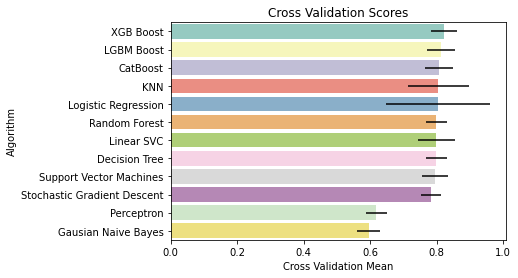

In [590]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

## Hyperparameter tunig xgboost

In [591]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.816, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.831, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.826, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.781, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.843, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.782, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.815, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.826, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.781, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.826, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.781, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.854, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.782, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.815, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.826, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.781, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.826, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.781, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.854, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.6s finished


GridSearchCV(estimator=XGBClassifier(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [592]:

print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best estimator:  XGBClassifier(C=0.1, gamma=1, kernel='rbf')


In [593]:
xgb = XGBClassifier(C = 100, gamma = 0.01, kernel = 'rbf')
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb

83.5

In [594]:

# Mean cross validation score

cross_val_score(xgb, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8204369538077403

In [595]:
# Survival predictions by xgboostclassifier

Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [596]:
len(Y_pred)

418

## preparing data for submission

In [597]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [598]:
ss.shape

(418, 2)

In [600]:

# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [606]:
# Create and save csv file
submit.to_csv('submission.csv',index =False)

In [608]:
df= pd.read_csv('submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [603]:
df.shape

(418, 3)